# Проект "Сегментирование клиентов-физических лиц Метанпромбанка" (основные характеристики и декомпозиция)

## Описание исследования
- Исследование проводится по просьбе отдела маркетинга Метанпромбанка- регионального банка в Ярославской области.
- Заказчику требуется исследовать имеющийся массив данных по клиентам-физическим лицам методами анализа данных. 

## Цель исследования:
Предложить обновленную эффективную группировку клиентов-физическим лиц по сегментам (желательно не более 7 сегментов) в связи с изменившимся составом клиентов банка и драматически увеличившимся оттоком клиентов из банка, для установления потенциальных проблемных зон в банке и получению возможных рекомендаций по прекращению оттока.

## Суть исследования
- Изучить предоставленный набор данных, выявить закономерности у клиентов с схожими параметрами (напр. кол-во используемых банковских продуктов, возраст, доход и т.д.), сформулировать параметры сегментации и соответствующие рекомендации заказчику.
- Отдельно обратить внимание и выявить закономерности для клиентов, прекративших пользоваться услугами банка.

## Задачи исследования (декомпозиция)

### Провести предобработку данных
- Проверить данные на
  - очевидные аномалии 
  - пропущенные значения
  - корректность типов данных
  - наличие а) явных и б) неявных дубликатов
  - корректность названия колнок
- При необходимости провести корректировки  

### Провести исследовательский анализ данных
- По просьба заказчика, в качестве первого шага, сгруппировать пользователей на основе данных о количестве потребляемых
продуктов, выявить общие особенности получившихся сегментов
- Изучить возможности других группировок 
  - как гипотеза: сочетание различных параметров, напр. город-доход-оценка собственности
  - возможно следует выделить "обуславливающие" характеристики слиентов, которые могут влиять на их потребности в банковских продуктах
  - возможно следует добавить новые группирующие колонки-корзины (по доходу, оценке стоимости активов, географии (Ярославль-область) и т.д.)
  - при необходимости возможна замена данных на более удобные для анализа
- Провести корреляционный анализ по наиболее интересным параметрам непрерывных данных

### Провести сегментацию
- Сформулировать параметры итоговой сегментацию (не более 7 сегментов), добавить соответствующую колонку в набор данных
- Рассмотреть отток клиентов по получившимся сегментам

### Провести статистические проверки гипотез
1. По просьбе заказчика, проверить гипотезу различия возраста между теми клиентами, которые
пользуются двумя продуктами банка, и теми, которые пользуются одним.
2. Проверить гипотезу о том, что зарплаты в Ярославле выше чем в области (Ростов+Рыбинск)

### Сформулировать общий вывод исследования
- Кратко сформулировать характеристики и описание сегментов
- Выводы по оттоку клиентов
- Ремендации по маркетингу по сегментам

### Подготовить презентацию
- Инструмент: Power Point, результат в ПДФ-файле

Предполагаемый макет:
- Шапка
- Описание технических характеристик и целей исследования (1-2 слайда, текст)
- Основные выводы (1 слайд, текст)
- Слайды по сегментам (1 сегмент= 1 слайд, 1-2 диаграммы, важные характеристики и рекомендация по сегменту)
- Слайд по оттоку клиентов (1 слайд, 1-2 диаграммы, основной вывод, рекомендации(?))
- Слайд по результатам проверки гипотез (1 слайд, текст) 
- Слайд "до свидания"

## Исходные данные

-	userid — идентификатор пользователя
-	score — баллы кредитного скоринга (чем больше баллов тем надёжнее клиент)
-	city — город
-	gender — пол
-	age — возраст
-	equity  — баллы оценки активов клиента (чем больше баллов тем дороже)
-	Balance — собственные средства клиента в банке
-	Products — количество продуктов, которыми пользуется клиент
-	CreditCard — есть ли кредитная карта (1- есть, 0- нет)
-	last_activity— активный клиент (1- активный, 0- нет)
-	estimated_salary — заработная плата клиента
-	сhurn — ушёл или нет (1- ушёл, 0- не ушёл)

## Загрузка данных и предустановки

### Загрузка библиотек

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st
# import math as mth

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

### Задаём функции

#### Функция анализа файла данных `df_analysis`

In [2]:
def df_analysis (df):
    
# выводим первую строку датафрейма
    print(f'Случайная строка из датафрейма (всего {df.shape[1]} столбцов, {df.shape[0]} строк):')
    display(df_init.sample(1))
    print('-'*70+'\n')
    
#   выводим на экран таблицу подсчёта пустых значений
    if df.isna().sum().sum() == 0:
        print(f'В датафрейме нет пустых значений','-'*70+'\n', sep="\n")        
    else:
        nan_columns = df.isna().sum().reset_index()
        nan_columns.columns = ['col_name','count_na'] 
        nan_columns = nan_columns[nan_columns['count_na'] != 0]
        nan_columns['share_of_total'] = nan_columns['count_na'] / df.shape[0]
        nan_columns['share_of_total'] = round(nan_columns['share_of_total']*100,2)
        nan_columns = nan_columns.sort_values(by='share_of_total', ascending=False)
        print ('Колонки с пустыми значениями:', nan_columns, '-'*70+'\n', sep='\n')
    
            
#   выводим на экран количество дубликатов
    print(f'В датафрейме {df.duplicated().sum()} явных дубликатов.', '-'*70+'\n', sep="\n")    
    
    print(df.info(),'-'*70+'\n', sep="\n")    
    
# выводим на экран количество уникальных значений на экран и списки уникальных значений, если их количество <=50
    print("Количество уникальных значений в столбцах:", df.nunique(),'-'*70+'\n', sep="\n")
    
    for col in list(df.columns):
        if df[col].nunique() <= 50:
            print(f'В колонке {col} {df[col].nunique()} уникальных значений.',
                  "Список значений отсортированных по возрастанию:", df[col].sort_values().unique(),'-'*70+'\n', sep="\n")

#### Функция нормализации названия колонок `df_col_names_normalize`

In [3]:
def df_col_names_normalize (df):
#   "нормализуем" названия колонок
    old_cols = list(df.columns)
    new_cols = []
    for col in old_cols:
        new_cols.append(col.lower().replace(' ','_'))
    df.columns=new_cols
    print('Новые названия колонок:\n', df.columns)

    

### Загрузка данных

In [4]:
# задаём название файла и тип разделителя данных для всех вариантов загрузки
file_name = 'bank_scrooge.csv'
sep_char = ','

# Загружаем данные, используя различные варианты
try:
    df_init = pd.read_csv(file_namet, sep=sep_char)
except:
    try:
        df_init = pd.read_csv('/datasets/'+file_name, sep=sep_char)
    except:
        df_init = pd.read_csv('https://code.s3.yandex.net/datasets/'+file_name, sep=sep_char)  

# Первичный осмотр и предобработка данных

## Анализ структуры данных

In [5]:
df_analysis(df_init)

Случайная строка из датафрейма (всего 12 столбцов, 10000 строк):


,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
3645,119546,895.0,Рыбинск,Ж,44.0,4,904514.86,2,1,0,137392.59,0


----------------------------------------------------------------------

Колонки с пустыми значениями:
  col_name  count_na  share_of_total
6  balance      2295           22.95
4      age        26            0.26
----------------------------------------------------------------------

В датафрейме 0 явных дубликатов.
----------------------------------------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity

### Визуальный осмотр данных

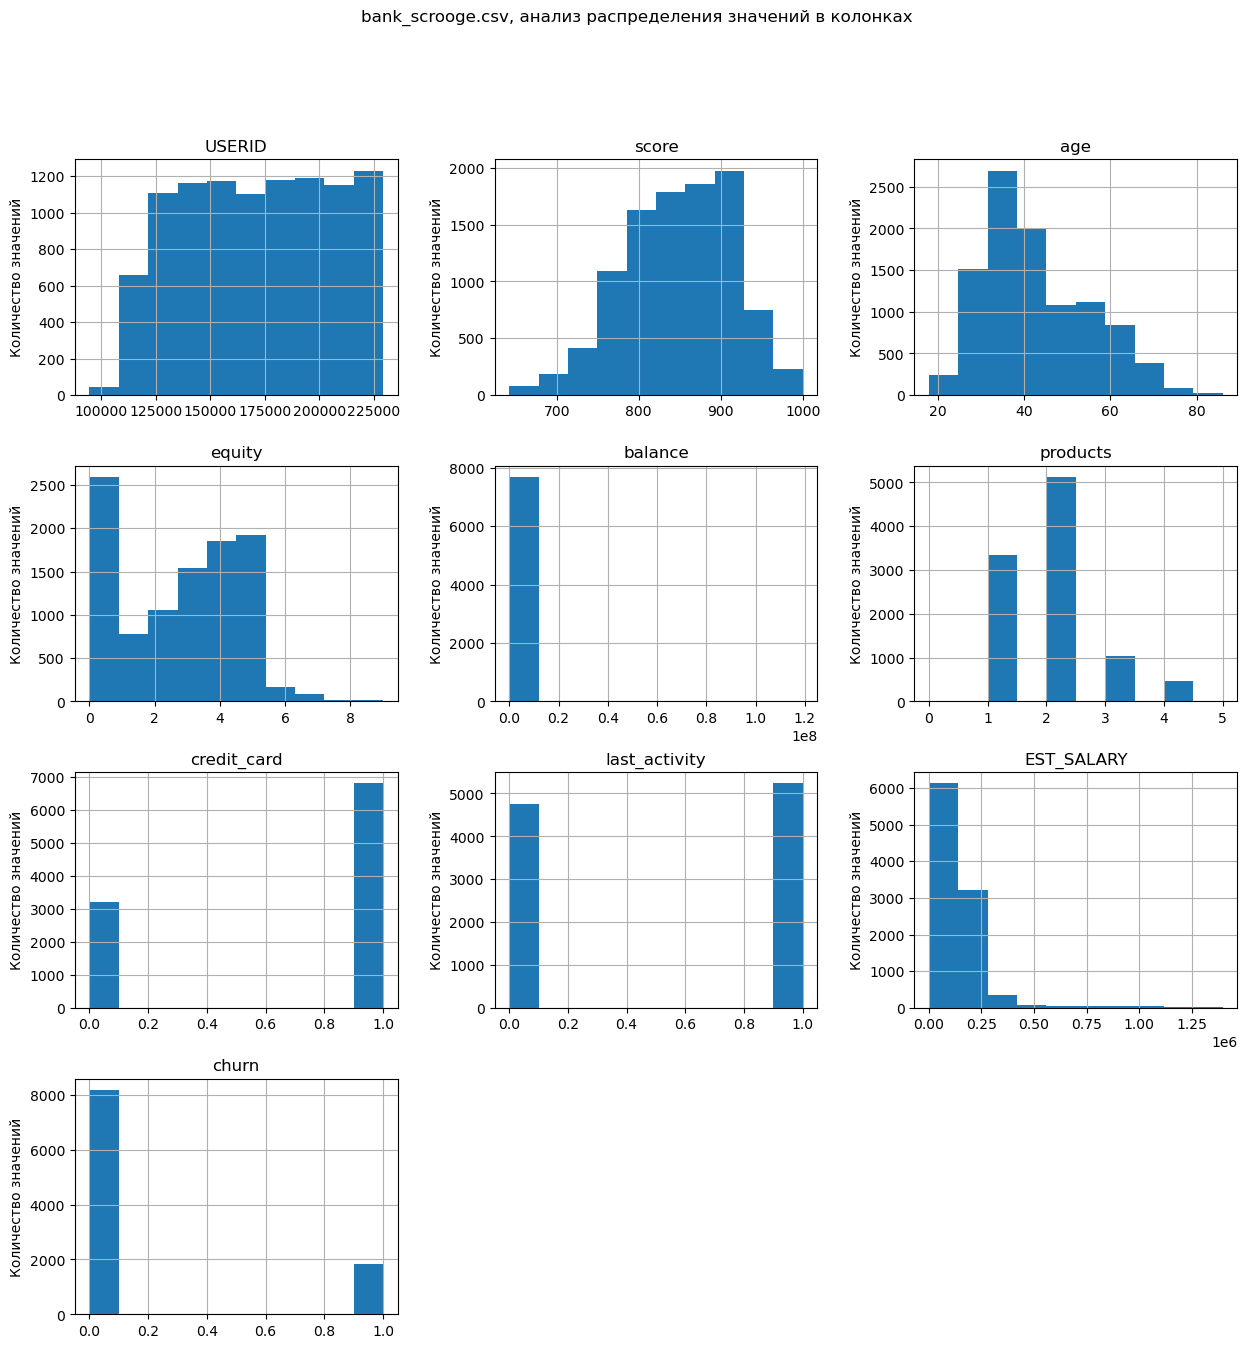

In [6]:
axarr = df_init.hist(figsize = (15, 15))
axarr
plt.suptitle('bank_scrooge.csv, анализ распределения значений в колонках', fontsize=12)
for ax in axarr.flatten(): 
    ax.set_xlabel("") 
    ax.set_ylabel("Количество значений");

### Выводы (обнаруженные проблемы в данных)
- Изменить:
1. Некоторые названия колонок не соответствуют стандартам
1. колонкам `score` и `age` назначен вещественный тип данных при ожидаемых целых значениях.
- Проверить:
1. В колонке `userid` есть дубликаты
2. имеются пропуски значений в столбцах `balance` (22%) и `age` (0,3%)

#### Сохранение данных в новой переменной

In [7]:
df=df_init.copy()

#### Исправление названий колонок

In [8]:
df_col_names_normalize (df)

Новые названия колонок:
 Index(['userid', 'score', 'city', 'gender', 'age', 'equity', 'balance',
       'products', 'credit_card', 'last_activity', 'est_salary', 'churn'],
      dtype='object')


#### Меняем тип для `score` и `age`(*)

In [9]:
df['score'] = df['score'].astype('int')
# Контроль операции
print ('Тип данных в колонке score:', df['score'].dtype)

Тип данных в колонке score: int32


##### Комментарий
- Пустые значения в `age` не дают изменить тип данных в серии, отложим до проверки причин пропусков.

#### Изучаем дубликаты в `userid`

In [10]:
uid_dupl = df[df['userid'].duplicated()]['userid']
df.query('userid in @uid_dupl').sort_values(by='userid')

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1893,116540,883,Рыбинск,Ж,55.0,1,362756.49,3,0,1,175920.48,1
7694,116540,887,Ярославль,Ж,38.0,0,NaN,1,0,1,119247.61,0
7542,117943,880,Ярославль,Ж,40.0,0,NaN,1,1,0,137718.93,0
4866,117943,855,Рыбинск,Ж,32.0,6,1036832.93,4,1,1,107792.71,1
5896,120258,905,Ярославль,М,30.0,0,NaN,1,1,1,146427.96,0
5863,120258,908,Рыбинск,Ж,38.0,4,2213581.63,2,0,1,160327.77,1
1411,123461,829,Ярославль,Ж,59.0,0,96222.44,2,0,1,102771.55,1
8638,123461,934,Рыбинск,М,34.0,0,NaN,2,1,0,291619.27,0
8164,124450,859,Ярославль,Ж,38.0,6,516811.20,1,1,1,95144.63,1
9775,124450,758,Рыбинск,Ж,36.0,0,73574.07,2,0,1,79963.59,0


Беглый осмотр показывает, что совпадающие коды клиентов как правило встречаются в разных городах. Проверим догадку подсчётом уникальных названий городов для одного кода.

In [11]:
# Группируем повторяющиеся коды и считаем уникальное количество названий в группировке
df.query('userid in @uid_dupl').sort_values(by='userid').groupby('userid').agg(city_cnt=('city','nunique'))\
.query('city_cnt !=2')

,city_cnt
userid,


In [12]:
# Устанавливаем города 
df.query('userid in @uid_dupl')['city'].unique()

array(['Ярославль', 'Рыбинск'], dtype=object)

##### Вывод
- Повторяющиеся коды всегда принадлежат клиентам из разных городов (Рыбинск и Ярославль).
- Можно предположить, что уникальность кодов в системе банка соблюдается только для клиентов из одного города.
- В любом случае очевидно, что данные не дублируются и относятся к разным клиентам банка.

#### Изучаем пропуски в `balance`

Визуально рассмотрим 10 случайных строк

In [13]:
df_bal_na = df[df['balance'].isna()]
df_bal_na.sample(10)

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
9448,155527,892,Рыбинск,М,26.0,0,NaN,1,0,1,69603.91,0
8370,168714,912,Ярославль,Ж,42.0,0,NaN,1,1,1,138654.42,0
2491,221605,903,Ярославль,М,42.0,0,NaN,1,1,0,213077.94,0
6859,227337,725,Ярославль,Ж,42.0,1,NaN,2,1,0,249184.25,0
5067,180485,706,Ярославль,М,55.0,0,NaN,1,1,0,227949.64,0
7977,192619,884,Ярославль,Ж,37.0,0,NaN,1,0,0,118072.08,0
7876,160145,960,Ярославль,М,50.0,0,NaN,1,1,0,967517.99,0
2573,222183,874,Ростов,М,32.0,0,NaN,1,1,1,58750.28,0
4786,222198,917,Ярославль,М,35.0,1,NaN,2,0,1,550298.99,0
2057,157559,916,Ростов,М,35.0,0,NaN,1,1,0,93709.70,0


##### Вывод 1
- Никаких очевидных аномалий визуально не отмечается. 
- Рассмотрим весь набор данных.

In [14]:
df_analysis(df_bal_na)

Случайная строка из датафрейма (всего 12 столбцов, 2295 строк):


,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
7079,121363,762.0,Ярославль,Ж,42.0,4,315815.82,2,1,0,223134.27,0


----------------------------------------------------------------------

Колонки с пустыми значениями:
  col_name  count_na  share_of_total
6  balance      2295           100.0
4      age        16             0.7
----------------------------------------------------------------------

В датафрейме 0 явных дубликатов.
----------------------------------------------------------------------

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2295 entries, 2 to 9997
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   userid         2295 non-null   int64  
 1   score          2295 non-null   int32  
 2   city           2295 non-null   object 
 3   gender         2295 non-null   object 
 4   age            2279 non-null   float64
 5   equity         2295 non-null   int64  
 6   balance        0 non-null      float64
 7   products       2295 non-null   int64  
 8   credit_card    2295 non-null   int64  
 9   last_activity 

##### Вывод 2 
- Пока не заметно никаких очевидных аномалий и перекосов данных - в наборе присутствуют почти все категориальные значения.
- При этом обращает на себя внимание, что имущество клиентов с пустым балансом оценивается низко (0-3 балла из 9)
- Сравним статистику набора данных с непустыми и пустыми балансами

In [15]:
df_mtx = pd.DataFrame(df[~df['balance'].isna()].describe())
# # Отбрасываем копейки в балансе и зарплате чтобы избежать экспоненциального представления
df_mtx['est_salary'] = df_mtx['est_salary'].astype('int')
df_mtx['balance'] = df_mtx['balance'].astype('int')
df_mtx

,userid,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn
count,7705.000000,7705.000000,7695.000000,7705.000000,7705,7705.000000,7705.000000,7705.000000,7705,7705.000000
mean,171738.837508,843.739260,42.924366,3.395068,827794,2.080986,0.640104,0.515769,124501,0.234523
std,33819.778127,55.332162,12.244010,1.584477,1980614,0.757231,0.480001,0.499784,104663,0.423728
min,94561.000000,689.000000,18.000000,0.000000,0,1.000000,0.000000,0.000000,2546,0.000000
25%,142639.000000,801.000000,33.000000,2.000000,295554,2.000000,0.000000,0.000000,67551,0.000000
50%,172740.000000,840.000000,40.000000,4.000000,524272,2.000000,1.000000,1.000000,106222,0.000000
75%,201168.000000,882.000000,52.000000,5.000000,980705,2.000000,1.000000,1.000000,155045,0.000000
max,229136.000000,1000.000000,86.000000,9.000000,119113552,5.000000,1.000000,1.000000,1395064,1.000000


In [16]:
df_bal_na_mtx = pd.DataFrame(df_bal_na.describe())
# Отбрасываем копейки зарплате чтобы избежать экспоненциального представления
df_bal_na_mtx['est_salary'] = df_bal_na_mtx['est_salary'].astype('int')
df_bal_na_mtx

,userid,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn
count,2295.000000,2295.000000,2279.000000,2295.000000,0.0,2295.000000,2295.000000,2295.000000,2295,2295.000000
mean,172069.447930,865.352070,42.093023,0.050980,NaN,1.162092,0.815686,0.549455,226310,0.005664
std,33337.084589,89.603091,11.941551,0.225872,NaN,0.402532,0.387824,0.497657,199771,0.075066
min,114182.000000,642.000000,18.000000,0.000000,NaN,0.000000,0.000000,0.000000,20274,0.000000
25%,143095.500000,871.000000,33.000000,0.000000,NaN,1.000000,1.000000,0.000000,120347,0.000000
50%,172659.000000,903.000000,40.000000,0.000000,NaN,1.000000,1.000000,1.000000,174160,0.000000
75%,201551.000000,922.000000,49.000000,0.000000,NaN,1.000000,1.000000,1.000000,240014,0.000000
max,229145.000000,990.000000,86.000000,3.000000,NaN,3.000000,1.000000,1.000000,1333687,1.000000


##### Вывод 3
Между "непустым" (№1) и "безбалансовым" (№2) наборами данных имеются заметные различия: 
- средний балл оценки активов в №1 заметно выше чем в №2 (3,39 против 0,5)
- в №1 меньше владельцев кредитных карт (64% против 81,5%)
- в №1 меньше медианная зарплата (106 тыс.руб. против 174тыс.руб.)
- в №1 выше среднее количество продуктов на клиета (2,08 против 1,16)

Дополнительно проверим некоторые детали.

In [17]:
print('\nКлиенты с нулевым балансом:')
df[df['balance']==0]


Клиенты с нулевым балансом:


,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
3900,179831,730,Ярославль,М,18.0,0,0.0,2,1,1,64548.33,0
6757,148456,813,Ярославль,М,20.0,2,0.0,2,1,0,23876.51,0


In [18]:
print('\nКоличество существующих (0) и ушедших (1) среди клиентов с пустым балансом:')
df_bal_na['churn'].value_counts()


Количество существующих (0) и ушедших (1) среди клиентов с пустым балансом:


0    2282
1      13
Name: churn, dtype: int64

In [19]:
print('\nРаспределение баллов оценки активов среди клиентов с пустым балансом:')
df_bal_na['equity'].value_counts()


Распределение баллов оценки активов среди клиентов с пустым балансом:


0    2180
1     114
3       1
Name: equity, dtype: int64

In [20]:
print('\nКлиенты с пустыми балансами в возрасте 75 и старше:')
df_bal_na[df_bal_na['age']>=75].sort_values(by='age',ascending=False)


Клиенты с пустыми балансами в возрасте 75 и старше:


,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
9413,135210,921,Ярославль,Ж,86.0,0,NaN,1,0,1,36185.91,0
1621,151166,916,Рыбинск,Ж,83.0,0,NaN,1,1,1,55681.82,0
4387,117913,658,Рыбинск,Ж,81.0,0,NaN,1,1,1,105088.10,0
5602,151854,707,Ярославль,Ж,81.0,0,NaN,1,1,0,102360.77,0
540,188460,720,Ярославль,Ж,80.0,0,NaN,1,1,1,153804.84,0
9302,168360,960,Рыбинск,Ж,80.0,0,NaN,1,0,1,548776.90,0
8957,147837,962,Рыбинск,Ж,79.0,3,NaN,0,0,0,25063.96,1
414,129007,708,Рыбинск,Ж,78.0,0,NaN,1,1,1,342387.74,0
7750,126298,896,Ярославль,Ж,78.0,0,NaN,1,1,1,67343.92,0
255,219624,906,Ростов,Ж,77.0,0,NaN,1,1,0,138937.87,0


##### Вывод 4/4
- Вероятнее всего пустые значения в балансе означают клиентов-заёмщиков, у которых нет собственных средств в банке. Это подтверждается следующими соображениями:
 - в данных имеются клиенты с нулевым балансом, т.е. пустой баланс не означает нулевой.
 - нет клиентов с отрицательным балансом, который с точки зрения банка мог бы означать заёмщика, при этом у банка, конечно, должны быть заёмщики.
 - за редким исключением это существующие (неотточные) клиенты (что очевидно связагно с тем, что кредит не погашен, клиентские отношения сохраняются)
 - особенности набора показывают высокую вероятность потребности/возможности получить кредит: низкая стоимость собственных активов клиента, высокая зарплата, имеющаяся кредитная карта.
 
 Действия:
 - Чтобы не искажать средние оставляем пустые значения как есть
 - Для удобства анализа добавляем колонку `borrower` где 
   - 1 означает клиентов с пустым балансом, предположительно "заёмщиков",
   - 0 - клиентов с ненулевым балансом, "кредиторов".

##### Добавляем колонку `borrower`

In [21]:
df['borrower'] = df['balance'].apply(lambda x: 1 if pd.isnull(x) else 0).astype('int')
df.sample(10)

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,borrower
3981,192911,940,Ярославль,М,39.0,0,NaN,1,1,0,979545.41,0,1
6405,210620,819,Ярославль,Ж,60.0,3,811156.06,2,1,1,18424.67,0,0
7684,224191,896,Ярославль,М,50.0,4,3104746.67,3,0,0,253329.19,1,0
8153,132889,805,Ярославль,Ж,53.0,1,236455.02,2,0,1,95854.75,0,0
9222,155343,864,Ростов,М,56.0,5,1398442.46,2,1,0,114538.94,0,0
5377,185090,759,Ярославль,Ж,40.0,4,622456.69,2,0,1,70295.94,0,0
4506,119637,889,Ярославль,Ж,40.0,5,519590.77,2,1,1,152949.18,1,0
6892,152005,927,Ярославль,Ж,34.0,5,3782453.73,3,0,1,1142435.95,1,0
9650,116288,800,Ярославль,М,30.0,2,116089.63,2,1,1,38670.97,0,0
1075,217735,834,Ростов,М,62.0,5,1278296.38,2,0,0,133749.35,0,0


#### Изучаем пропуски в `age`
- Пропусков всего 26, смотрим все строки.

In [22]:
df[df['age'].isna()]

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,borrower
1247,228075,932,Ярославль,М,NaN,5,7601719.20,2,1,1,408121.16,0,0
2165,187635,692,Рыбинск,Ж,NaN,0,NaN,1,1,1,160368.82,0,1
2444,221156,913,Ярославль,М,NaN,0,NaN,1,1,1,135693.24,0,1
3091,138660,836,Ростов,Ж,NaN,5,294315.53,2,0,1,63310.22,1,0
4912,210674,834,Рыбинск,М,NaN,1,238330.52,2,0,1,93775.06,0,0
5470,218868,827,Рыбинск,Ж,NaN,4,448959.07,2,1,1,67835.95,0,0
5495,151662,884,Рыбинск,Ж,NaN,0,NaN,1,1,1,137500.77,0,1
7236,210135,908,Рыбинск,Ж,NaN,4,1120340.31,3,1,1,85002.15,0,0
7248,219343,920,Рыбинск,Ж,NaN,0,NaN,1,1,0,159248.67,0,1
7345,184913,829,Ярославль,Ж,NaN,3,188648.77,2,0,1,75206.90,0,0


##### Вывод
- Визуально не удаётся обнаружить какую-то закономерность в пропусках.
- Поскольку строк с пропусками немного (менее промилля от всех строк) для удобства анализа удалим данные.

##### Удаляем строки c пропусками колонке `age`

In [23]:
df = df.dropna(subset=['age'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9974 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   userid         9974 non-null   int64  
 1   score          9974 non-null   int32  
 2   city           9974 non-null   object 
 3   gender         9974 non-null   object 
 4   age            9974 non-null   float64
 5   equity         9974 non-null   int64  
 6   balance        7695 non-null   float64
 7   products       9974 non-null   int64  
 8   credit_card    9974 non-null   int64  
 9   last_activity  9974 non-null   int64  
 10  est_salary     9974 non-null   float64
 11  churn          9974 non-null   int64  
 12  borrower       9974 non-null   int32  
dtypes: float64(3), int32(2), int64(6), object(2)
memory usage: 1013.0+ KB


##### Меняем тип данных в `age`

In [24]:
df['age']=df['age'].astype('int')
print('Новый тип данных в колонке age:', df['age'].dtype)

Новый тип данных в колонке age: int32


# Исследовательский анализ

## Дополняем данные для анализа

### Сохраняем предобработанный датафрейм в `df_processed`

In [25]:
df_processed = df.copy()
df_processed.head(1)

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,borrower
0,183012,850,Рыбинск,Ж,25,1,59214.82,2,0,1,75719.14,1,0


### География клиентов
- В наборе данных присутствуют 3 города, один областной центр (Ярославль) и два районных (Ростов и Рыбинск)
- Интуитивно можно предположить, что клиентский профиль в городах отличается за счёт, например, уровня доходов (центр-периферия).
- Для упрощения анализа (например расчёта средних) добавим колонку `region`, где 1 будет означать Ярославль, а 0- остальные города

#### Добавление колонки `region`

In [26]:
df['region'] = df['city'].apply(lambda x: 1 if x=='Ярославль' else 0).astype('int')
df.sample(10)

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,borrower,region
2793,168743,878,Ярославль,Ж,53,5,1054884.02,2,0,1,137495.27,1,0,1
3208,191382,887,Ярославль,Ж,31,4,697208.53,2,1,0,96782.39,0,0,1
9245,183450,829,Рыбинск,М,54,1,357492.13,2,1,1,38385.66,0,0,0
9857,193683,904,Ярославль,М,59,3,840991.29,2,1,0,285258.59,0,0,1
5189,196563,890,Ярославль,М,37,5,937858.29,2,1,0,251965.49,0,0,1
4887,161183,700,Ярославль,М,71,0,NaN,1,1,1,579562.96,0,1,1
7806,208061,873,Ярославль,Ж,52,3,529408.15,2,0,0,87941.18,0,0,1
3060,117127,935,Ярославль,М,36,0,NaN,2,1,1,235926.74,0,1,1
3519,138580,864,Ростов,М,46,7,683792.02,2,0,0,155921.10,0,0,0
1562,196786,897,Ярославль,М,33,1,NaN,1,1,0,171603.07,0,1,1


### Меняем значения в колонке `gender`
- Для упрощения анализа (например расчёта средних) текстовые обозначения пола на числовые, "М" на 1, "Ж" на 0. 

In [27]:
df['gender'] = df['gender'].replace('М', 1)
df['gender'] = df['gender'].replace('Ж', 0)
df['gender'] = df['gender'].astype('int')

# Проверим результат
df.groupby('gender').agg(gen_cnt=('gender','count'))

,gen_cnt
gender,
0,4983
1,4991


### Округляем значения в колонках `balance`, `est_salary`
- Для упрощения визуального анализа округлим значения до тысяч рублей.

In [28]:
df['balance']=round(df['balance']/1000,0)

In [29]:
df['est_salary']=round(df['est_salary']/1000,0)

In [30]:
# Проверка результата
df.sample(10)

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,borrower,region
3967,133930,785,Ростов,0,55,3,309.0,1,0,1,51.0,0,0,0
5074,205267,790,Ярославль,1,32,5,1207.0,3,1,0,119.0,0,0,1
7451,165231,814,Рыбинск,0,26,5,335.0,2,1,1,18.0,0,0,0
5641,185412,892,Рыбинск,0,40,0,NaN,1,1,1,148.0,0,1,0
8205,227795,840,Рыбинск,1,34,2,351.0,1,1,0,102.0,1,0,0
9867,193449,714,Рыбинск,1,33,0,NaN,1,1,0,151.0,0,1,0
1778,167175,861,Ярославль,0,29,5,830.0,2,1,1,30.0,0,0,1
6884,141206,910,Рыбинск,0,37,3,1813.0,4,1,1,185.0,1,0,0
6496,115699,853,Ростов,0,33,5,1106.0,2,0,1,82.0,1,0,0
2563,191111,910,Ярославль,0,36,0,NaN,1,1,0,159.0,0,1,1


### Проверяем структуру датафрейма

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9974 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   userid         9974 non-null   int64  
 1   score          9974 non-null   int32  
 2   city           9974 non-null   object 
 3   gender         9974 non-null   int32  
 4   age            9974 non-null   int32  
 5   equity         9974 non-null   int64  
 6   balance        7695 non-null   float64
 7   products       9974 non-null   int64  
 8   credit_card    9974 non-null   int64  
 9   last_activity  9974 non-null   int64  
 10  est_salary     9974 non-null   float64
 11  churn          9974 non-null   int64  
 12  borrower       9974 non-null   int32  
 13  region         9974 non-null   int32  
dtypes: float64(2), int32(5), int64(6), object(1)
memory usage: 974.0+ KB


## Анализируем выбросы

*Смотрим статистику по набору данных*

In [32]:
df.drop('userid', axis=1).describe()

,score,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,borrower,region
count,9974.000000,9974.000000,9974.000000,9974.000000,7695.000000,9974.000000,9974.000000,9974.000000,9974.000000,9974.000000,9974.000000,9974.000000
mean,848.682575,0.500401,42.734409,2.630840,827.247693,1.871466,0.680168,0.522859,147.785943,0.182374,0.228494,0.589031
std,65.399720,0.500025,12.179971,1.979965,1980.329882,0.792729,0.466435,0.499502,139.289938,0.386172,0.419884,0.492034
min,642.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000
25%,802.000000,0.000000,33.000000,0.000000,296.000000,1.000000,0.000000,0.000000,75.000000,0.000000,0.000000,0.000000
50%,853.000000,1.000000,40.000000,3.000000,524.000000,2.000000,1.000000,1.000000,120.000000,0.000000,0.000000,1.000000
75%,900.000000,1.000000,51.000000,4.000000,980.000000,2.000000,1.000000,1.000000,174.000000,0.000000,0.000000,1.000000
max,1000.000000,1.000000,86.000000,9.000000,119114.000000,5.000000,1.000000,1.000000,1395.000000,1.000000,1.000000,1.000000


### Количество продуктов `products`
- Ноль продуктов выглядит странно

In [33]:
df[df['products']==0]

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,borrower,region
8957,147837,962,Рыбинск,0,79,3,NaN,0,0,0,25.0,1,1,0


#### Вывод
- Всего одна запись, единственный "заёмщик" с 3 баллами оценки активов, явная аномалия- **удаляем**

In [34]:
df = df[df['products']!=0]

In [35]:
print ("Количество клиентов с нулём продуктов:", df[df['products']==0]['userid'].count())

Количество клиентов с нулём продуктов: 0


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9973 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   userid         9973 non-null   int64  
 1   score          9973 non-null   int32  
 2   city           9973 non-null   object 
 3   gender         9973 non-null   int32  
 4   age            9973 non-null   int32  
 5   equity         9973 non-null   int64  
 6   balance        7695 non-null   float64
 7   products       9973 non-null   int64  
 8   credit_card    9973 non-null   int64  
 9   last_activity  9973 non-null   int64  
 10  est_salary     9973 non-null   float64
 11  churn          9973 non-null   int64  
 12  borrower       9973 non-null   int32  
 13  region         9973 non-null   int32  
dtypes: float64(2), int32(5), int64(6), object(1)
memory usage: 973.9+ KB


### Балансы и зарплата (`balance`, `est_salary`)
*Баланс и зарплата должны быть связаны, рассмотрим их на диаграмме рассеяния.*

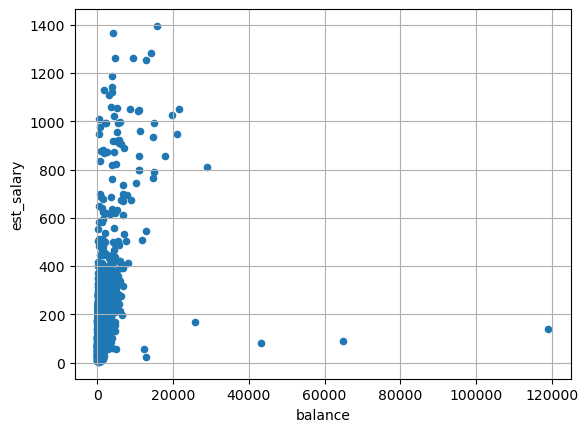

In [37]:
df.plot(x='balance', y='est_salary', kind='scatter', grid=True); 

#### Вывод 1

- Есть очевидные выбросы в балансе
- Имеются и редкие значения в зарплате
- Имеются несколько клиентов с относительно невысокой зарплатой и очень высоким балансом.
Посмотрим на данные клиентов у которых с выбросами в балансе или зарплате.

In [38]:
# Установим перцентили для опрделения выброса для баланса (bal) и зарплаты (salary)
bal_perc = 99
salary_perc = 99

In [39]:
# Для расчёта значения перцентиля баланса берём только непустые значения
df_norm_bal = df[df['borrower']==0]

In [40]:
bal_perc_val = np.percentile(df_norm_bal['balance'],bal_perc) # значение перцентиля баланса
salary_perc_val = np.percentile(df['est_salary'],salary_perc) # значение перцентиля зарплаты
print (f'{bal_perc}-й перцентиль для баланса: {bal_perc_val: 0.1f} тыс.руб.')
print (f'{salary_perc}-й перцентиль для зарплаты: {salary_perc_val: .1f} тыс.руб.')

99-й перцентиль для баланса:  4827.0 тыс.руб.
99-й перцентиль для зарплаты:  886.6 тыс.руб.


In [41]:
df[(df['balance'] >= bal_perc_val) \
  | (df['est_salary'] >= salary_perc_val)]\
.drop('userid', axis=1).describe()

,score,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,borrower,region
count,156.000000,156.000000,156.000000,156.000000,93.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,901.282051,0.583333,43.006410,2.576923,10152.516129,1.884615,0.685897,0.551282,834.442308,0.211538,0.403846,0.884615
std,88.935699,0.494594,10.451422,2.260569,14313.263508,0.879601,0.465652,0.498965,339.721674,0.409715,0.492248,0.320514
min,686.000000,0.000000,24.000000,0.000000,426.000000,1.000000,0.000000,0.000000,22.000000,0.000000,0.000000,0.000000
25%,886.500000,0.000000,35.000000,0.000000,5069.000000,1.000000,0.000000,0.000000,593.500000,0.000000,0.000000,1.000000
50%,936.500000,1.000000,40.500000,3.000000,6178.000000,2.000000,1.000000,1.000000,955.000000,0.000000,0.000000,1.000000
75%,960.000000,1.000000,52.000000,5.000000,10886.000000,2.000000,1.000000,1.000000,1059.500000,0.000000,1.000000,1.000000
max,1000.000000,1.000000,66.000000,8.000000,119114.000000,4.000000,1.000000,1.000000,1395.000000,1.000000,1.000000,1.000000


#### Вывод 2/2
- 156 клиентов можно отнести к "сверхбогатым"
- из статистических особенностей этой группы можно отметить высокую долю "заёмщиков" (40%) и жителей региональной столицы (88%).

*Имеет смысл выделить "сверхбогатых" в отдельный набор данных и в дальнейшем анализировать "обычных" (нормализованных) клиентов.*

##### Создаём датафрейм `df_rich_cust` для "сверхбогатых" 

In [42]:
df_rich_cust = df[(df['balance'] >= bal_perc_val) \
  | (df['est_salary'] >= salary_perc_val)]
df_rich_cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156 entries, 107 to 9862
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   userid         156 non-null    int64  
 1   score          156 non-null    int32  
 2   city           156 non-null    object 
 3   gender         156 non-null    int32  
 4   age            156 non-null    int32  
 5   equity         156 non-null    int64  
 6   balance        93 non-null     float64
 7   products       156 non-null    int64  
 8   credit_card    156 non-null    int64  
 9   last_activity  156 non-null    int64  
 10  est_salary     156 non-null    float64
 11  churn          156 non-null    int64  
 12  borrower       156 non-null    int32  
 13  region         156 non-null    int32  
dtypes: float64(2), int32(5), int64(6), object(1)
memory usage: 15.2+ KB


##### Удаляем "сверхбогатых" из основного датафрейма

In [43]:
df = df[~((df['balance'] >= bal_perc_val)\
   | (df['est_salary'] >= salary_perc_val))]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9817 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   userid         9817 non-null   int64  
 1   score          9817 non-null   int32  
 2   city           9817 non-null   object 
 3   gender         9817 non-null   int32  
 4   age            9817 non-null   int32  
 5   equity         9817 non-null   int64  
 6   balance        7602 non-null   float64
 7   products       9817 non-null   int64  
 8   credit_card    9817 non-null   int64  
 9   last_activity  9817 non-null   int64  
 10  est_salary     9817 non-null   float64
 11  churn          9817 non-null   int64  
 12  borrower       9817 non-null   int32  
 13  region         9817 non-null   int32  
dtypes: float64(2), int32(5), int64(6), object(1)
memory usage: 958.7+ KB


## Анализируем "нормализованные" данные

### Считаем и анализируем статистики

In [44]:
df.drop('userid', axis=1).describe()

,score,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,borrower,region
count,9817.000000,9817.000000,9817.000000,9817.000000,7602.000000,9817.000000,9817.000000,9817.000000,9817.000000,9817.000000,9817.000000,9817.000000
mean,847.835184,0.499134,42.726393,2.631659,713.165877,1.871447,0.680147,0.522461,136.886931,0.181827,0.225629,0.584394
std,64.611460,0.500025,12.201001,1.975401,642.663562,0.791134,0.466443,0.499521,101.370799,0.385722,0.418017,0.492851
min,642.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000
25%,802.000000,0.000000,33.000000,0.000000,293.000000,1.000000,0.000000,0.000000,75.000000,0.000000,0.000000,0.000000
50%,852.000000,0.000000,40.000000,3.000000,517.000000,2.000000,1.000000,1.000000,118.000000,0.000000,0.000000,1.000000
75%,899.000000,1.000000,51.000000,4.000000,956.000000,2.000000,1.000000,1.000000,171.000000,0.000000,0.000000,1.000000
max,999.000000,1.000000,86.000000,9.000000,4804.000000,5.000000,1.000000,1.000000,886.000000,1.000000,1.000000,1.000000


In [45]:
dwell_cnt = df.groupby('city', as_index=False).agg(dwell_cnt=('city','count'))
dwell_cnt['share']= dwell_cnt['dwell_cnt']/dwell_cnt['dwell_cnt'].sum()
print ("\nРаспределение клиентов по городам")
dwell_cnt


Распределение клиентов по городам


,city,dwell_cnt,share
0,Ростов,1412,0.143832
1,Рыбинск,2668,0.271773
2,Ярославль,5737,0.584394


#### Вывод по статистикам
- В нормализованных данных 9817 записей
- Среди клиентов примерно поровну мужчин и женщин; средний возраст 43 года, медианный 40 лет; 58% живут в Ярославле, остальные в Рыбинске (27%) и Ростове (14%).
- Медианный кредитный скоринг 852 (при диапазоне 642-999), средний балл оценки активов клиента 2,63 (диапазон 0-9).
- Медианный баланс 517 тыс. руб., медианная зарплата- 118 тыс. руб.
- С точки зрения взаимодействия клиентов с банком:
 - В среднем клиент использует 1,87 продукта (медиана 2 продукта)
 - Кредитную карту имеют 68% клиентов
 - К активным ("лояльным") клиентам относятся 52%
 - Отточных (ушедших из банка)- 18%
 - "Заёмщиков" (клиентов с пустым балансом) 23%

### Ищем корреляции между параметрами

*Чтобы посмотреть корреляции по городам, добавим колонки с цифровыми бинарными значениями для категорий*

In [46]:
df_corr = pd.get_dummies(df)
df_corr.head(1)

,userid,score,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,borrower,region,city_Ростов,city_Рыбинск,city_Ярославль
0,183012,850,0,25,1,59.0,2,0,1,76.0,1,0,0,0,1,0


In [47]:
# Переименовывем столбцы c бинарными значениями по городам
df_corr=df_corr.rename(columns = {'city_Ростов':'Ростов', 'city_Рыбинск':'Рыбинск','city_Ярославль':'Ярославль'})
df_corr.head(1)

,userid,score,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,borrower,region,Ростов,Рыбинск,Ярославль
0,183012,850,0,25,1,59.0,2,0,1,76.0,1,0,0,0,1,0


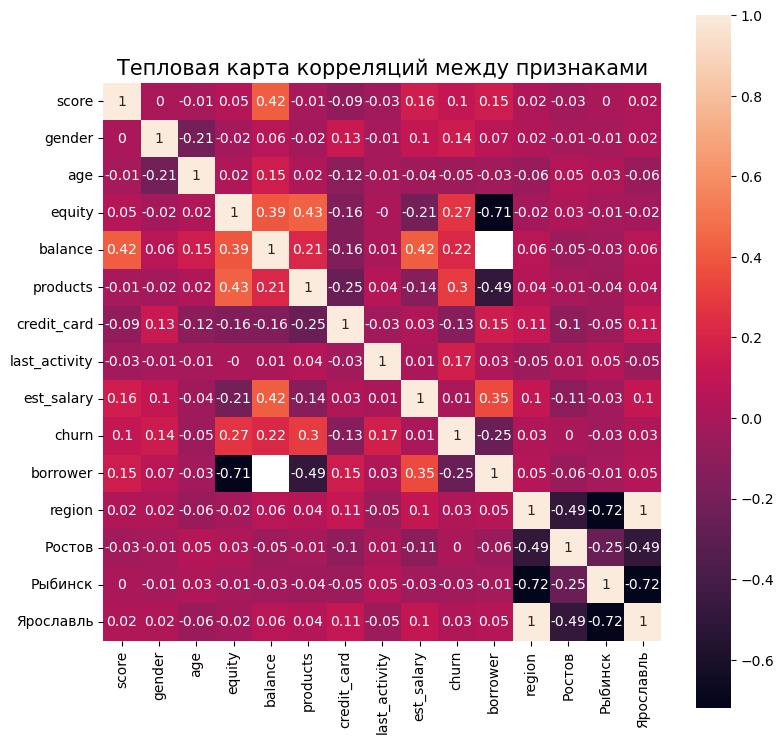

In [48]:
# Расчитываем корреляцию по всем параметрам кроме кода пользователя
corr_tabl = df_corr.drop('userid', axis = 1).corr().round(2)

# Для простоты визуального анализа строим тепловую карту
plt.figure(figsize=(9,9))
sns.heatmap(corr_tabl, annot = True, square = True)
plt.title('Тепловая карта корреляций между признаками', fontsize=15)
plt.show();

#### Вывод по корреляциям 
* (Теснота связи описывается в соответствии со шкалой Чеддока) 
- Имеется высокая отрицательная корреляция между типом клиента "заёмщик"/"кредитор" и оценкой активов. Это соответствует нашим более ранним наблюдениям о том что у "заёмщиков" (пустой баланс, код в колонке borrower 1) низкая оценка активов (1-2 из 9 баллов).
- Высокие отрицательные корреляции между городами не дают никакой практической информации.
- По остальным параметрам теснота связи не превышает уровень "умеренный"

# Сегментируем клиентов

## `cols_cat`, `cols_num`, `dict_agg_func`, `dict_agg_name` группируем колонки по типу данных

Для удобства анализа и вычислений получим  переменные по общим характеристикам данных:
- cols_cat - список колонок с категориальными данными
- cols_num - список колонок с числовыми данными
- dict_agg_func - словарь колонок с агрегирующими функциями
- dict_agg_func - словарь колонок со сменой названия

In [49]:
df.columns

Index(['userid', 'score', 'city', 'gender', 'age', 'equity', 'balance',
       'products', 'credit_card', 'last_activity', 'est_salary', 'churn',
       'borrower', 'region'],
      dtype='object')

In [50]:
cols_cat = ['city', 'gender', 'equity', 
       'products', 'credit_card', 'last_activity', 'churn',
       'borrower', 'region']
print(cols_cat)

['city', 'gender', 'equity', 'products', 'credit_card', 'last_activity', 'churn', 'borrower', 'region']


In [51]:
cols_num = ['score', 'age', 'balance', 'est_salary']
print(cols_num)

['score', 'age', 'balance', 'est_salary']


In [52]:
dict_agg_func = {'score':'median', 'age': 'median',\
            'balance': 'median', 'est_salary': 'median', 'churn': 'count'}
print(dict_agg_func)

{'score': 'median', 'age': 'median', 'balance': 'median', 'est_salary': 'median', 'churn': 'count'}


In [53]:
dict_agg_name = {'score':'score_med', 'age': 'age_med',\
            'balance': 'balance_med', 'est_salary': 'est_salary_med', 'churn': 'clients_num'}
print(dict_agg_name)

{'score': 'score_med', 'age': 'age_med', 'balance': 'balance_med', 'est_salary': 'est_salary_med', 'churn': 'clients_num'}


## Сегментация по количеству продуктов
*По предложению заказчика начнём анализ с сегментации по количеству продуктов*

*Рассмотрим количественное распределение клиентов по числу используемых продуктов*

In [54]:
df['products'].value_counts()

2    5052
1    3264
3    1019
4     463
5      19
Name: products, dtype: int64

### Формируем сегменты (колонка `segm_prod`)
1. Исходя из количественного распределения имеет смысл разбить клиентов на 3 группы:
 - Используется 1 продукт (код 1)
 - Используется 2 продукта (код 2)
 - Используется 3 продукта (код 3)
 - Используется 4 или более продуктов (код 4)
1. Добавить в датафрейм колонку `segm_prod` с соответствующими кодами.

In [55]:
df['segm_prod'] = df['products'].apply(lambda x: 4 if x>= 4 else x).astype('int')
print ('\nРаспределение значений в колонке segm_prod.')
df['segm_prod'].value_counts()                                  


Распределение значений в колонке segm_prod.


2    5052
1    3264
3    1019
4     482
Name: segm_prod, dtype: int64

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9817 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   userid         9817 non-null   int64  
 1   score          9817 non-null   int32  
 2   city           9817 non-null   object 
 3   gender         9817 non-null   int32  
 4   age            9817 non-null   int32  
 5   equity         9817 non-null   int64  
 6   balance        7602 non-null   float64
 7   products       9817 non-null   int64  
 8   credit_card    9817 non-null   int64  
 9   last_activity  9817 non-null   int64  
 10  est_salary     9817 non-null   float64
 11  churn          9817 non-null   int64  
 12  borrower       9817 non-null   int32  
 13  region         9817 non-null   int32  
 14  segm_prod      9817 non-null   int32  
dtypes: float64(2), int32(6), int64(6), object(1)
memory usage: 997.0+ KB


### Анализируем особенности сегментов по количеству продуктов

In [57]:
print(f'\nСредние по сегментам:')
display(df.drop('userid', axis=1).groupby('segm_prod', as_index=False).agg('mean'))
print(f'\nКоличество и доли клиентов и медианы по сегментам:')
df_segm = df.drop('userid', axis=1).groupby('segm_prod', as_index=False)\
.agg(dict_agg_func).rename(columns = dict_agg_name)
df_segm['clients_share'] = df_segm['clients_num']/df['churn'].count()*100
df_segm


Средние по сегментам:


,segm_prod,score,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,borrower,region
0,1,854.054841,0.539828,42.214154,1.338848,544.959332,1.000000,0.862439,0.528493,165.919424,0.070772,0.578125,0.602635
1,2,843.533056,0.475653,42.754157,3.147070,690.642181,2.000000,0.626485,0.514450,121.620348,0.190024,0.059580,0.534046
2,3,836.051030,0.428852,45.763494,3.513248,861.927419,3.000000,0.357213,0.415113,119.754661,0.287537,0.026497,0.745829
3,4,875.721992,0.618257,39.483402,4.120332,1109.553942,4.039419,0.690871,0.792531,136.518672,0.624481,0.000000,0.647303



Количество и доли клиентов и медианы по сегментам:


,segm_prod,score_med,age_med,balance_med,est_salary_med,clients_num,clients_share
0,1,883.0,40.0,412.0,141.0,3264,33.248447
1,2,843.0,40.0,509.0,108.0,5052,51.461750
2,3,827.0,42.0,652.5,105.0,1019,10.379953
3,4,872.0,37.0,887.0,120.5,482,4.909850


### Выводы
- Подавляющее большинство клиентов пользуется одним (51% от общего количества клиентов) или двумя продуктами (33%)
- Увеличение количества используемых продуктов соответствует увеличению размера баланса, баллов оценки имущества и уровня оттока клиентов
- Ярославцы заметно преобладают во всех сегментах кроме "продукта"
- У клиентов с одним продуктом самая высокая медианная зарплата.


## Сегментация параметров по уровню отточности

### Методология
- 
- Средняя отточность в банке 18%, заказчик считатет, что такой уровень слишком высок, соответственно при расчёте сегментов будем опираться на эту цифру как минимальный покзатель рискового сегмента
- В исследуемых данных 9817 клиентов, соответственно будем считать, что минимальный объём сегмента параметра должен составлять около 300 человек (3% от общей массива данных)

In [58]:
df_churn = df[df['churn']==1].drop('userid', axis=1)
df_churn.describe()

,score,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,borrower,region,segm_prod
count,1785.000000,1785.000000,1785.000000,1785.000000,1774.000000,1785.000000,1785.000000,1785.000000,1785.000000,1785.0,1785.000000,1785.000000,1785.000000
mean,861.805602,0.648739,41.398319,3.754622,973.009583,2.376471,0.552381,0.699720,138.274510,1.0,0.006162,0.610644,2.371989
std,48.527288,0.477498,11.151168,1.591479,800.360914,0.921532,0.497388,0.458508,87.879068,0.0,0.078281,0.487741,0.911129
min,706.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.000000,1.0,0.000000,0.000000,1.000000
25%,827.000000,0.000000,32.000000,3.000000,382.250000,2.000000,0.000000,0.000000,83.000000,1.0,0.000000,0.000000,2.000000
50%,866.000000,1.000000,39.000000,4.000000,770.500000,2.000000,1.000000,1.000000,124.000000,1.0,0.000000,1.000000,2.000000
75%,896.000000,1.000000,52.000000,5.000000,1319.000000,3.000000,1.000000,1.000000,174.000000,1.0,0.000000,1.000000,3.000000
max,999.000000,1.000000,75.000000,9.000000,4804.000000,5.000000,1.000000,1.000000,881.000000,1.0,1.000000,1.000000,4.000000


### Изучаем числовые параметры

In [59]:
sns.set_style('whitegrid')

#### Оцениваем распределения визуально

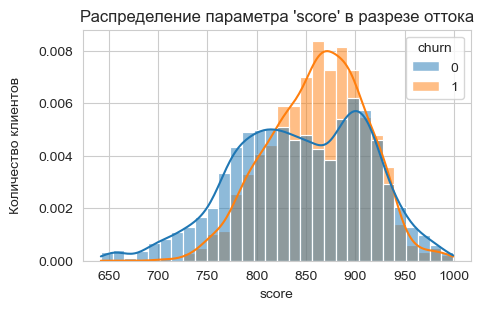

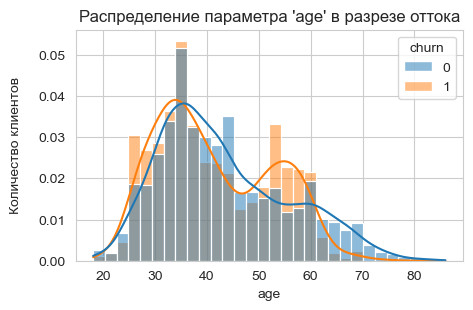

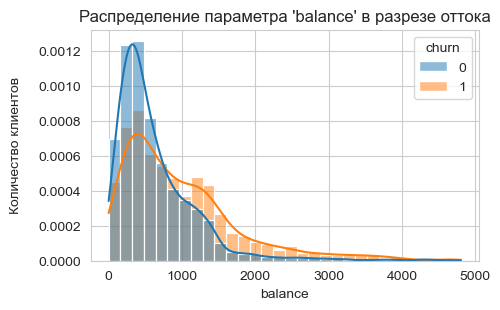

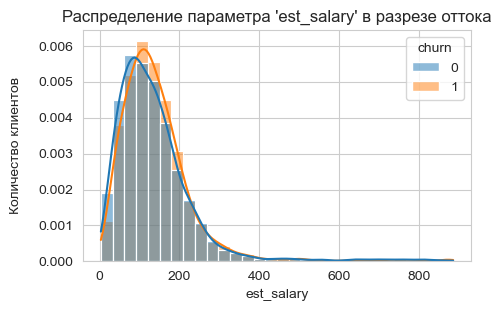

In [60]:
for col in cols_num:
    plt.figure(figsize=(5,3))
    sns.histplot(data=df, x=col, hue='churn', kde=True,  bins=30, stat='density', common_norm=False)
    plt.title(f"Распределение параметра '{col}' в разрезе оттока", fontsize=12)
    plt.ylabel('Количество клиентов', labelpad=12)
    plt.show();

#### Вывод
- По параметрам скоринг, возраст и баланс можно выделить диапазоны данных где уровень отточности очевидно выше
- Далее рассмотрим отточность по каждому параметру отдельно

#### Сегментируем `score` (скоринг клиентов)

##### Определяем границы корзин сегментов

In [61]:
# Задаём колонку с числовыми данными для изучения
param_num = 'score'

# Задаём имя рабочего файла с группировкой по сегментам
num_segm_name = 'segm_score'

# bins=[df[param_num].min(), 170, 200, df[param_num].max()],

# Вручную задаём сегменты и прописываем их в колонке базы данных
df[num_segm_name] = pd.cut(df[param_num], 
                          bins=[df[param_num].min(), 820, 940, df[param_num].max()],
                          include_lowest = True)

# Задаём параметры датафрейма с агрегацией данных по сегментам
df_segm = df.groupby(num_segm_name, as_index=False)\
.agg(churn_pct=('churn','mean'), # уровень отточночти в сегменте
     clients_no=('churn','count'), # количество всех (отточных и неотточных) клиентов в сегменте
     churned_no=('churn','sum')) # количество отточных клиентов в сегменте

# Переводим долю отточных в проценты и округляем
df_segm['churn_pct'] = round(df_segm['churn_pct']*100, 2)

# Для контроля считаем общее количество клиентов по всем сегментам
df_segm['clients_all_no'] = df_segm['clients_no'].sum()

# Расчитываем долю 
df_segm['churn_clients_share'] = round(df_segm['churned_no']/df['churn'].sum()*100 ,2)


df_segm['all_clients_share'] = round(df_segm['clients_no']/df['churn'].count()*100, 2)

df_segm

,segm_score,churn_pct,clients_no,churned_no,clients_all_no,churn_clients_share,all_clients_share
0,"(641.999, 820.0]",10.94,3364,368,9817,20.62,34.27
1,"(820.0, 940.0]",22.93,5904,1354,9817,75.85,60.14
2,"(940.0, 999.0]",11.48,549,63,9817,3.53,5.59


*Изучаем агрегированные данные по сегментам* 

In [62]:
df.groupby(num_segm_name, as_index=False)[cols_num].agg('mean')

,segm_score,score,age,balance,est_salary
0,"(641.999, 820.0]",775.626040,42.840071,481.873021,122.463436
1,"(820.0, 940.0]",878.529810,42.707656,819.161741,139.562669
2,"(940.0, 999.0]",960.204007,42.231330,1288.889571,196.491803


##### Вывод
- В параметре кредитный скоринг подбором значений удалось выявить сегмент 820-940 баллов в котором уровень отточности заметно выше чем в остальных данных

#### Сегментируем `age` (возраст клиентов)

##### Определяем границы корзин сегментов

In [63]:
# Задаём колонку с числовыми данными для изучения
param_num = 'age'

# Задаём имя рабочего файла с группировкой по сегментам
num_segm_name = 'segm_age'

# bins=[df[param_num].min(), 170, 200, df[param_num].max()],

# Вручную задаём сегменты и прописываем их в колонке базы данных
df[num_segm_name] = pd.cut(df[param_num], 
                          bins=[df[param_num].min(), 25, 36, 49, 60, df[param_num].max()],
                          include_lowest = True)

# Задаём параметры датафрейма с агрегацией данных по сегментам
df_segm = df.groupby(num_segm_name, as_index=False)\
.agg(churn_pct=('churn','mean'), # уровень отточночти в сегменте
     clients_no=('churn','count'), # количество всех (отточных и неотточных) клиентов в сегменте
     churned_no=('churn','sum')) # количество отточных клиентов в сегменте

# Переводим долю отточных в проценты и округляем
df_segm['churn_pct'] = round(df_segm['churn_pct']*100, 2)

# Для контроля считаем общее количество клиентов по всем сегментам
df_segm['clients_all_no'] = df_segm['clients_no'].sum()

# Расчитываем долю 
df_segm['churn_clients_share'] = round(df_segm['churned_no']/df['churn'].sum()*100 ,2)


df_segm['all_clients_share'] = round(df_segm['clients_no']/df['churn'].count()*100, 2)

df_segm

,segm_age,churn_pct,clients_no,churned_no,clients_all_no,churn_clients_share,all_clients_share
0,"(17.999, 25.0]",16.62,373,62,9817,3.47,3.80
1,"(25.0, 36.0]",20.75,3277,680,9817,38.10,33.38
2,"(36.0, 49.0]",15.26,3415,521,9817,29.19,34.79
3,"(49.0, 60.0]",26.47,1730,458,9817,25.66,17.62
4,"(60.0, 86.0]",6.26,1022,64,9817,3.59,10.41


*Изучаем агрегированные данные по сегментам* 

In [64]:
df.groupby(num_segm_name, as_index=False)[cols_cat].agg('mean')

,segm_age,gender,equity,products,credit_card,last_activity,churn,borrower,region
0,"(17.999, 25.0]",0.640751,2.243968,1.841823,0.785523,0.592493,0.166220,0.254692,0.552279
1,"(25.0, 36.0]",0.571559,2.640220,1.866341,0.727495,0.535551,0.207507,0.231004,0.616723
2,"(36.0, 49.0]",0.531479,2.609370,1.851537,0.692826,0.493411,0.152562,0.237482,0.596779
3,"(49.0, 60.0]",0.437572,2.730636,1.919653,0.601156,0.518497,0.264740,0.200000,0.534104
4,"(60.0, 86.0]",0.211350,2.652642,1.883562,0.581213,0.558708,0.062622,0.201566,0.536204


##### Вывод
- В параметре возраст удалось выявить два сегмента (25-36 и 49-60 лет) в которых уровень отточности заметно выше чем в остальных данных

In [65]:
cat_segm_name = 'equity'

df_segm = df.groupby(cat_segm_name, as_index=False)\
.agg(churn_pct=('churn','mean'), # уровень отточночти в сегменте
     clients_no=('churn','count'), # количество всех (отточных и неотточных) клиентов в сегменте
     churned_no=('churn','sum')) # количество отточных клиентов в сегменте

# Переводим долю отточных в проценты и округляем
df_segm['churn_pct'] = round(df_segm['churn_pct']*100, 2)

# Для контроля считаем общее количество клиентов по всем сегментам
df_segm['clients_all_no'] = df_segm['clients_no'].sum()

df_segm

,equity,churn_pct,clients_no,churned_no,clients_all_no
0,0,3.54,2513,89,9817
1,1,12.03,773,93,9817
2,2,15.85,1047,166,9817
3,3,20.56,1527,314,9817
4,4,25.11,1816,456,9817
5,5,29.90,1873,560,9817
6,6,36.25,160,58,9817
7,7,45.57,79,36,9817
8,8,37.50,16,6,9817
9,9,53.85,13,7,9817


#### Сегментируем `balance` (баланс)

##### Определяем границы корзин сегментов

In [66]:
# Задаём колонку с числовыми данными для изучения
param_num = 'balance'

# Задаём имя рабочего файла с группировкой по сегментам
num_segm_name = 'segm_bal'

# bins=[df[param_num].min(), 170, 200, df[param_num].max()],

# Вручную задаём сегменты и прописываем их в колонке базы данных
df[num_segm_name] = pd.cut(df[param_num], 
                          bins=[df[param_num].min(), 480, df[param_num].max()],
                          include_lowest = True)

# Задаём параметры датафрейма с агрегацией данных по сегментам
df_segm = df.groupby(num_segm_name, as_index=False)\
.agg(churn_pct=('churn','mean'), # уровень отточночти в сегменте
     clients_no=('churn','count'), # количество всех (отточных и неотточных) клиентов в сегменте
     churned_no=('churn','sum')) # количество отточных клиентов в сегменте

# Переводим долю отточных в проценты и округляем
df_segm['churn_pct'] = round(df_segm['churn_pct']*100, 2)

# Для контроля считаем общее количество клиентов по всем сегментам
df_segm['clients_all_no'] = df_segm['clients_no'].sum()

# Расчитываем долю сегмента в общем количестве отточных клиентов
df_segm['churn_clients_share'] = round(df_segm['churned_no']/df['churn'].sum()*100 ,2)

# Расчитываем долю сегмента в общем всех клиентов
df_segm['all_clients_share'] = round(df_segm['clients_no']/df['churn'].count()*100, 2)

df_segm

,segm_bal,churn_pct,clients_no,churned_no,clients_all_no,churn_clients_share,all_clients_share
0,"(-0.001, 480.0]",16.53,3570,590,7602,33.05,36.37
1,"(480.0, 4804.0]",29.37,4032,1184,7602,66.33,41.07


*Изучаем агрегированные данные по сегментам* 

In [67]:
df.groupby(num_segm_name, as_index=False)[cols_cat].agg('mean')

,segm_bal,gender,equity,products,credit_card,last_activity,churn,borrower,region
0,"(-0.001, 480.0]",0.474790,2.528011,1.958543,0.708403,0.511485,0.165266,0.0,0.551541
1,"(480.0, 4804.0]",0.487599,4.140873,2.185020,0.582341,0.516369,0.293651,0.0,0.588046


##### Вывод
- В параметре баланс сегмент в котором уровень отточности заметно выше чем в остальных данных приходится на диапазон от 480 тыс. руб.

#### Сегментируем `est_salary` (баланс)

##### Определяем границы корзин сегментов

In [68]:
# Задаём колонку с числовыми данными для изучения
param_num = 'est_salary'

# Задаём имя рабочего файла с группировкой по сегментам
num_segm_name = 'segm_sal'

# bins=[df[param_num].min(), 170, 200, df[param_num].max()],

# Вручную задаём сегменты и прописываем их в колонке базы данных
df[num_segm_name] = pd.cut(df[param_num], 
                          bins=[df[param_num].min(), 91, df[param_num].max()],
                          include_lowest = True)

# Задаём параметры датафрейма с агрегацией данных по сегментам
df_segm = df.groupby(num_segm_name, as_index=False)\
.agg(churn_pct=('churn','mean'), # уровень отточночти в сегменте
     clients_no=('churn','count'), # количество всех (отточных и неотточных) клиентов в сегменте
     churned_no=('churn','sum')) # количество отточных клиентов в сегменте

# Переводим долю отточных в проценты и округляем
df_segm['churn_pct'] = round(df_segm['churn_pct']*100, 2)

# Для контроля считаем общее количество клиентов по всем сегментам
df_segm['clients_all_no'] = df_segm['clients_no'].sum()

# Расчитываем долю сегмента в общем количестве отточных клиентов
df_segm['churn_clients_share'] = round(df_segm['churned_no']/df['churn'].sum()*100 ,2)

# Расчитываем долю сегмента в общем всех клиентов
df_segm['all_clients_share'] = round(df_segm['clients_no']/df['churn'].count()*100, 2)

df_segm

,segm_sal,churn_pct,clients_no,churned_no,clients_all_no,churn_clients_share,all_clients_share
0,"(2.999, 91.0]",15.61,3407,532,9817,29.8,34.71
1,"(91.0, 886.0]",19.55,6410,1253,9817,70.2,65.29


*Изучаем агрегированные данные по сегментам* 

In [69]:
df.groupby(num_segm_name, as_index=False)[cols_cat].agg('mean')

,segm_sal,gender,equity,products,credit_card,last_activity,churn,borrower,region
0,"(2.999, 91.0]",0.439977,3.001761,1.973877,0.673026,0.531259,0.156149,0.089228,0.527737
1,"(91.0, 886.0]",0.530577,2.434945,1.817005,0.683931,0.517785,0.195476,0.298128,0.614509


##### Вывод
- В параметре предполагаемая зарплата сегмент в котором уровень отточности выше чем в остальных данных приходится на диапазон от 91 тыс. руб.
- При этом разница в отточности по сегментам не так очевидна как в балансе, возрасте или скоринге.

### Изучаем категориальные параметры 

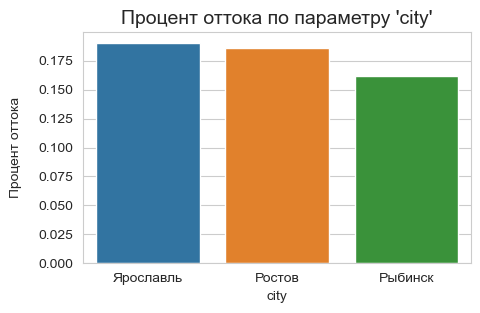

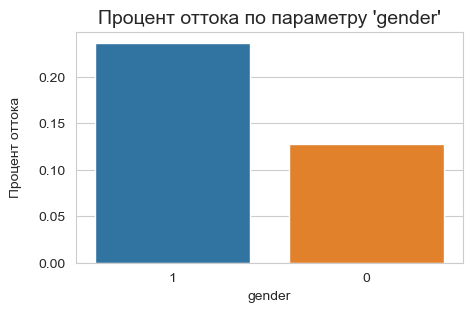

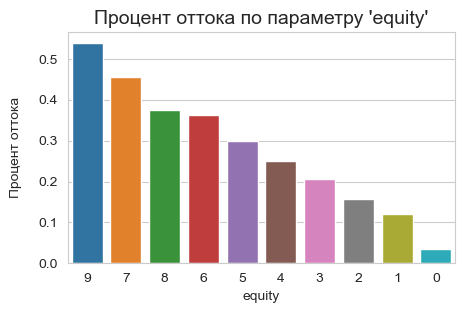

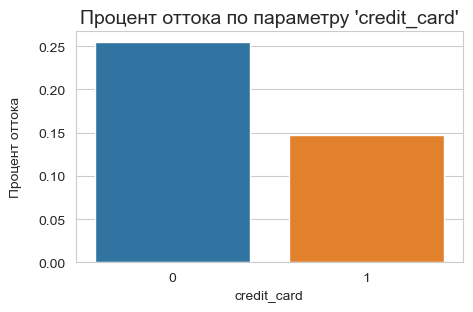

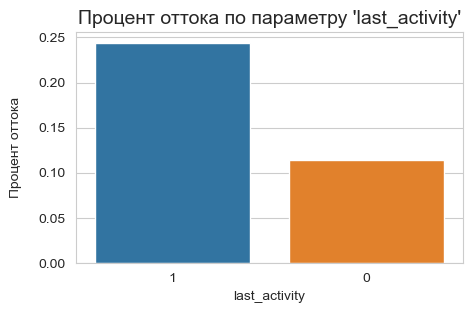

In [70]:
# Создаём список параметров, по котрым будем строить диаграммы 
graph_cats = ['city', 'gender', 'equity', 'credit_card', 'last_activity']

sns.set_style('whitegrid')
for col in graph_cats:
    plt.figure(figsize=(5,3))
    df_cat_graph = df.groupby(col, as_index=False).agg(churn_pct=('churn','mean'))
#     bars_order = list(df.sort_values(by ='churn_pct').columns)
    sns.barplot(x=col, y= 'churn_pct', data=df_cat_graph, \
                order = df_cat_graph.sort_values('churn_pct', ascending=False)[col])
    plt.title(f"Процент оттока по параметру '{col}'", fontsize=14)
    plt.ylabel('Процент оттока', labelpad=12)
    plt.show();

#### Вывод 
Крооме городов, практически по всем категориям наблюдаем очевидную неравномерность уровня отточности:

- Клиенты-мужчины покидают банк чаще женщин
- Отточность заметно растёт по мере увеличения балла оценки активов клиента.
- Клиенты без кредитной карты уходят чаще
- Активные клиенты также (несколько неожиданно) уходят чаще.


#### Добавляем для `equity` укрупнённую группировку.

In [71]:
# Задаём параметры датафрейма с агрегацией данных по сегментам
df_segm = df.groupby('equity', as_index=False)\
.agg(churn_pct=('churn','mean'), # уровень отточночти в сегменте
     clients_no=('churn','count'), # количество всех (отточных и неотточных) клиентов в сегменте
     churned_no=('churn','sum')) # количество отточных клиентов в сегменте

# Переводим долю отточных в проценты и округляем
df_segm['churn_pct'] = round(df_segm['churn_pct']*100, 2)

# Для контроля считаем общее количество клиентов по всем сегментам
df_segm['clients_all_no'] = df_segm['clients_no'].sum()

# Расчитываем долю сегмента в общем количестве отточных клиентов
df_segm['churn_clients_share'] = round(df_segm['churned_no']/df['churn'].sum()*100 ,2)

# Расчитываем долю сегмента в общем всех клиентов
df_segm['all_clients_share'] = round(df_segm['clients_no']/df['churn'].count()*100, 2)

df_segm.sort_values(by='churn_pct', ascending=False)

,equity,churn_pct,clients_no,churned_no,clients_all_no,churn_clients_share,all_clients_share
9,9,53.85,13,7,9817,0.39,0.13
7,7,45.57,79,36,9817,2.02,0.80
8,8,37.50,16,6,9817,0.34,0.16
6,6,36.25,160,58,9817,3.25,1.63
5,5,29.90,1873,560,9817,31.37,19.08
4,4,25.11,1816,456,9817,25.55,18.50
3,3,20.56,1527,314,9817,17.59,15.55
2,2,15.85,1047,166,9817,9.30,10.67
1,1,12.03,773,93,9817,5.21,7.87
0,0,3.54,2513,89,9817,4.99,25.60


##### Вывод
1. 9 категорий очевидно можно укрупнить исходя из количества клиентов и уровня отточности
2. Создадим 3 группировки:
   - 5+ для клиентов с 5 баллами оценки активов и выше
   - 4-3 - с 4 или 3 баллами
   - 2-  - 2 балла или меньше

In [72]:
df['segm_eqty']=df['equity'].apply(lambda x: '5+' if x>=5 else ('4-3' if x== 4 or x==3 else '2-' ))
df.sample(10)

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,borrower,region,segm_prod,segm_score,segm_age,segm_bal,segm_sal,segm_eqty
7611,130884,903,Ростов,1,39,3,1079.0,2,1,0,180.0,0,0,0,2,"(820.0, 940.0]","(36.0, 49.0]","(480.0, 4804.0]","(91.0, 886.0]",4-3
5914,220916,855,Ярославль,1,36,7,243.0,2,0,0,189.0,0,0,1,2,"(820.0, 940.0]","(25.0, 36.0]","(-0.001, 480.0]","(91.0, 886.0]",5+
6072,157497,788,Ярославль,1,38,1,97.0,2,1,1,168.0,1,0,1,2,"(641.999, 820.0]","(36.0, 49.0]","(-0.001, 480.0]","(91.0, 886.0]",2-
7859,213256,742,Ярославль,0,36,0,NaN,1,1,1,217.0,0,1,1,1,"(641.999, 820.0]","(25.0, 36.0]",NaN,"(91.0, 886.0]",2-
985,206879,843,Ярославль,1,28,3,654.0,2,0,1,103.0,1,0,1,2,"(820.0, 940.0]","(25.0, 36.0]","(480.0, 4804.0]","(91.0, 886.0]",4-3
7541,220929,872,Ярославль,1,56,5,885.0,3,0,0,112.0,1,0,1,3,"(820.0, 940.0]","(49.0, 60.0]","(480.0, 4804.0]","(91.0, 886.0]",5+
2371,219473,873,Ростов,0,74,2,431.0,2,0,1,51.0,0,0,0,2,"(820.0, 940.0]","(60.0, 86.0]","(-0.001, 480.0]","(2.999, 91.0]",2-
6802,201439,908,Ярославль,0,72,5,1773.0,3,1,0,78.0,0,0,1,3,"(820.0, 940.0]","(60.0, 86.0]","(480.0, 4804.0]","(2.999, 91.0]",5+
8263,170184,909,Ярославль,1,50,3,490.0,1,1,0,210.0,0,0,1,1,"(820.0, 940.0]","(49.0, 60.0]","(480.0, 4804.0]","(91.0, 886.0]",4-3
4617,145938,929,Ростов,0,61,5,1059.0,2,0,1,89.0,0,0,0,2,"(820.0, 940.0]","(60.0, 86.0]","(480.0, 4804.0]","(2.999, 91.0]",5+


### Оформляем финальный вариант сегментации 

#### Обснование и методология
- Формулируем критерии сегментов только для "обычных" клиентов ("сверхбогатые" уже составляют отдельный сегмент).
- Поскольку заказчика исследования интересует сегментация по числу используемых продуктов, воспользуемся уже полученной выше сегментацией `segm_prod`, тем более что уровень отточности здесь заметно отличается от сегмента к сегменту.
- Установим основанием для выделения сегмента 27% (в полтора раза больше среднего) или больше процентов отточности.
- Установим минимальный размер сегмента в 300 клиентов (~3% от от общего числа клиентов)
- При выделении сегмента будем приоритизировать параметры скоринг, баллы оценки активов и предполагаемая зарплата, т.к. именно они скорее всего определяют финансовое поведение клиента.
- Сегментов должно быть не больше 7
- При сегментации будем пытаться охватить около 80% отточных клиентов
- Наименование сегментов:
   - Для высокоотточных сегментов формат n-i, где n код сегмента продукта и i номер подсегмента
   - n-0 означает, что продуктовый сегмент полностью высокоотточный
   - Сегмент 0-0 это сегмент по умолчанию.

#### Добавляем колонку `segm_hi_churn` в датафрейм для отточной сегментации

In [73]:
df['segm_hi_churn'] = '0-0'

#### Задаём функцию `code_assgn` для присвоения кода сегмента

In [74]:
def code_assgn (row):
#     Задаём код 4-0
    if row['segm_prod'] == 4:
        row['segm_hi_churn'] = '4-0'    
        
#     Задаём код 3-1
    elif row['segm_prod'] == 3 and row['segm_eqty']!='2-':
        row['segm_hi_churn'] = '3-1'
                                    
#    Задаём код 2-1                                    
    elif row['segm_prod']==2  and row['score']>=800 and row['score']<=950 and row['segm_eqty']!='2-':
        row['segm_hi_churn'] = '2-1'                             

    return row 

##### Описание критериев выделения сегментов
- Сегмент 4-0: все клиенты с количеством продуктов 4 и больше
- Сегмент 3-1: клиенты с баллами оценки активов выше 2, которые пользуются 3 продуктами
- Сегмент 2-1: клиенты с баллами оценки активов выше 2 и скорингом 800-950, которые пользуются 2 продуктами

In [75]:
df.columns

Index(['userid', 'score', 'city', 'gender', 'age', 'equity', 'balance',
       'products', 'credit_card', 'last_activity', 'est_salary', 'churn',
       'borrower', 'region', 'segm_prod', 'segm_score', 'segm_age', 'segm_bal',
       'segm_sal', 'segm_eqty', 'segm_hi_churn'],
      dtype='object')

In [76]:
# Анализируем комбинации различных параметров для получения наиболее отточного сегмента

# Список колонок для группировки
agg_cols_list = ['segm_prod']

# Задаём параметры датафрейма с агрегацией данных по сегментам
df_segm = df[(df['segm_prod']==2)  & (df['score']>=800) & (df['score']<=950)& (df['segm_eqty']!='2-')].groupby(agg_cols_list, as_index=False)\
.agg(churn_pct=('churn','mean'), # уровень отточно чти в сегменте
     clients_no=('churn','count'), # количество всех (отточных и неотточных) клиентов в сегменте
     churned_no=('churn','sum')) # количество отточных клиентов в сегменте

# Переводим долю отточных в проценты и округляем
df_segm['churn_pct'] = round(df_segm['churn_pct']*100, 2)

# Для контроля считаем общее количество клиентов по всем сегментам
df_segm['clients_all_no'] = df['churn'].count()

# Для контроля считаем общее количество отточных клиентов по всем сегментам
df_segm['churned_all_no'] = df['churn'].sum()

df_segm['churned_share'] = round(df_segm['churned_no']/df_segm['churned_all_no']*100, 2)

df_segm.sort_values(by='churn_pct', ascending= False).reset_index()

,index,segm_prod,churn_pct,clients_no,churned_no,clients_all_no,churned_all_no,churned_share
0,0,2,27.0,2681,724,9817,1785,40.56


#### Прописываем коды сегментов в датафрейм
и проверяем результат.

In [77]:
df = df.apply(code_assgn, axis=1)

In [78]:
# Задаём список колонок-сегментов, по которым агрегируем данные 
# 'segm_prod', 'segm_score', 'segm_eqty', 'segm_age', 'segm_bal', 'segm_sal'
agg_cols_list = ['segm_hi_churn']

# Задаём параметры датафрейма с агрегацией данных по сегментам
df_segm = df.groupby(agg_cols_list, as_index=False)\
.agg(churn_pct=('churn','mean'), # уровень отточночти в сегменте
     clients_no=('churn','count'), # количество всех (отточных и неотточных) клиентов в сегменте
     churned_no=('churn','sum')) # количество отточных клиентов в сегменте

# Переводим долю отточных в проценты и округляем
df_segm['churn_pct'] = round(df_segm['churn_pct']*100, 2)

# Для контроля считаем общее количество клиентов по всем сегментам
df_segm['clients_all_no'] = df['churn'].count()

# Для контроля считаем общее количество отточных клиентов по всем сегментам
df_segm['churned_all_no'] = df['churn'].sum()

df_segm['churned_share'] = round(df_segm['churned_no']/df_segm['churned_all_no']*100, 2)

df_segm['clients_all_share'] = round(df_segm['clients_no']/df_segm['clients_all_no']*100, 2)

df_segm.sort_values(by='churn_pct', ascending= False).reset_index()

,index,segm_hi_churn,churn_pct,clients_no,churned_no,clients_all_no,churned_all_no,churned_share,clients_all_share
0,3,4-0,62.45,482,301,9817,1785,16.86,4.91
1,2,3-1,31.53,777,245,9817,1785,13.73,7.91
2,1,2-1,27.00,2681,724,9817,1785,40.56,27.31
3,0,0-0,8.76,5877,515,9817,1785,28.85,59.87


### Описание (портреты сегментов)

#### Сегмент "сверхбогатые"

In [79]:
df_rich_cust.drop('userid', axis=1).describe()

,score,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,borrower,region
count,156.000000,156.000000,156.000000,156.000000,93.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,901.282051,0.583333,43.006410,2.576923,10152.516129,1.884615,0.685897,0.551282,834.442308,0.211538,0.403846,0.884615
std,88.935699,0.494594,10.451422,2.260569,14313.263508,0.879601,0.465652,0.498965,339.721674,0.409715,0.492248,0.320514
min,686.000000,0.000000,24.000000,0.000000,426.000000,1.000000,0.000000,0.000000,22.000000,0.000000,0.000000,0.000000
25%,886.500000,0.000000,35.000000,0.000000,5069.000000,1.000000,0.000000,0.000000,593.500000,0.000000,0.000000,1.000000
50%,936.500000,1.000000,40.500000,3.000000,6178.000000,2.000000,1.000000,1.000000,955.000000,0.000000,0.000000,1.000000
75%,960.000000,1.000000,52.000000,5.000000,10886.000000,2.000000,1.000000,1.000000,1059.500000,0.000000,1.000000,1.000000
max,1000.000000,1.000000,66.000000,8.000000,119114.000000,4.000000,1.000000,1.000000,1395.000000,1.000000,1.000000,1.000000


In [80]:
df_rich_cust.query('balance>100000')

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,borrower,region
7597,156149,900,Ярославль,1,62,5,119114.0,2,1,1,138.0,0,0,1


##### Описание
- В сегмент "сверхбогатые" входят клиенты, у которых или баланс больше 4,800тыс.руб. или зарплата выше 880 тыс. руб.
- это не очень показательный сегмент, здесь много выбросов и необычных сочетаний. Например, здесь имеется клиент с огоромным балансом в 120 млн. руб. и зарплатой всего в 138 тыс. руб. что близко к медиане
- Уровень оттока не сильно превышает средний по банку- 21%
- в сегменте всего 156 клиентов, 88% проживают в Ярославле, медианный возраст 40 года, мужчины чуть преобладают: 58%
- Заметно выше чем среднем по банку (закономерно): медианный баланс 6190 тыс. руб. и медианная зарплата 955 тыс. руб.
- остальные параметры близки к средним

#### Сегмент 4-0

In [81]:
#  Задаём колонки для анализа
cols_desc = ['score', 'age', 'balance', 'est_salary', 'gender', 'equity', 
       'products', 'credit_card', 'last_activity', 'churn',
       'borrower', 'region']

display(df.query('segm_hi_churn =="4-0"')[cols_desc].describe())

,score,age,balance,est_salary,gender,equity,products,credit_card,last_activity,churn,borrower,region
count,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.0,482.000000
mean,875.721992,39.483402,1109.553942,136.518672,0.618257,4.120332,4.039419,0.690871,0.792531,0.624481,0.0,0.647303
std,40.437543,9.530820,892.788878,94.820876,0.486319,1.464068,0.194792,0.462614,0.405915,0.484760,0.0,0.478306
min,768.000000,19.000000,8.000000,5.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,847.250000,33.000000,428.500000,74.000000,0.000000,3.000000,4.000000,0.000000,1.000000,0.000000,0.0,0.000000
50%,872.000000,37.000000,887.000000,120.500000,1.000000,4.000000,4.000000,1.000000,1.000000,1.000000,0.0,1.000000
75%,905.000000,46.000000,1501.500000,177.750000,1.000000,5.000000,4.000000,1.000000,1.000000,1.000000,0.0,1.000000
max,979.000000,62.000000,4804.000000,871.000000,1.000000,9.000000,5.000000,1.000000,1.000000,1.000000,0.0,1.000000


##### Описание
- В сегмент входят клиенты, которые используют 4 или 5 продуктов
- **это самый высокоотточный сегмент в наборе данных- уровень оттока 62%!**
- в сегменте 482 клиента, 64% проживают в Ярославле, 62% мужчин, медианный возраст 37 лет
- Заметно выше чем среднем по банку: медианный баланс 887 тыс. руб., средний балл оценки активов 4,12, доля активных клиентов 79%.

#### Сегмент 3-1

In [82]:
#  Задаём колонки для анализа
cols_desc = ['score', 'age', 'balance', 'est_salary', 'gender', 'equity', 
       'products', 'credit_card', 'last_activity', 'churn',
       'borrower', 'region']

display(df.query('segm_hi_churn =="3-1"')[cols_desc].describe())

,score,age,balance,est_salary,gender,equity,products,credit_card,last_activity,churn,borrower,region
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.0,777.000000,777.000000,777.000000,777.0,777.000000
mean,842.042471,45.947233,969.783784,119.631918,0.435006,4.220077,3.0,0.341055,0.424710,0.315315,0.0,0.752896
std,56.041332,13.247682,734.128298,81.337298,0.496077,0.953403,0.0,0.474369,0.494617,0.464941,0.0,0.431606
min,731.000000,19.000000,0.000000,8.000000,0.000000,3.000000,3.0,0.000000,0.000000,0.000000,0.0,0.000000
25%,797.000000,36.000000,448.000000,68.000000,0.000000,3.000000,3.0,0.000000,0.000000,0.000000,0.0,1.000000
50%,833.000000,43.000000,771.000000,104.000000,0.000000,4.000000,3.0,0.000000,0.000000,0.000000,0.0,1.000000
75%,884.000000,57.000000,1291.000000,157.000000,1.000000,5.000000,3.0,1.000000,1.000000,1.000000,0.0,1.000000
max,996.000000,83.000000,4748.000000,875.000000,1.000000,9.000000,3.0,1.000000,1.000000,1.000000,0.0,1.000000


##### Описание
- В сегмент 3-1 входят клиенты, которые используют 3 продукта и чьи активы оцениваются более чем в 2 балла
- Уровень оттока 32%
- в сегменте 777 клиентов, 75% проживают в Ярославле, медианный возраст 43 года, мужчин и женщин примерно поровну
- Заметно выше чем среднем по банку: медианный баланс 771 тыс. руб., средний балл оценки активов 4,22 (предсказуемо)
- Кредитной картой владеют менее 50% (заметно ниже среднего по банку)

#### Сегмент 2-1

In [83]:
#  Задаём колонки для анализа
cols_desc = ['score', 'age', 'balance', 'est_salary', 'gender', 'equity', 
       'products', 'credit_card', 'last_activity', 'churn',
       'borrower', 'region']

display(df.query('segm_hi_churn =="2-1"')[cols_desc].describe())

,score,age,balance,est_salary,gender,equity,products,credit_card,last_activity,churn,borrower,region
count,2681.000000,2681.000000,2681.000000,2681.000000,2681.000000,2681.000000,2681.0,2681.000000,2681.000000,2681.000000,2681.0,2681.000000
mean,864.234614,43.021261,870.315181,124.431928,0.469228,4.237598,2.0,0.573667,0.507646,0.270048,0.0,0.534129
std,37.387879,12.334665,629.624363,76.316744,0.499145,0.957229,0.0,0.494636,0.500035,0.444067,0.0,0.498927
min,800.000000,18.000000,7.000000,8.000000,0.000000,3.000000,2.0,0.000000,0.000000,0.000000,0.0,0.000000
25%,834.000000,33.000000,444.000000,73.000000,0.000000,3.000000,2.0,0.000000,0.000000,0.000000,0.0,0.000000
50%,863.000000,40.000000,692.000000,113.000000,0.000000,4.000000,2.0,1.000000,1.000000,0.000000,0.0,1.000000
75%,892.000000,52.000000,1118.000000,161.000000,1.000000,5.000000,2.0,1.000000,1.000000,1.000000,0.0,1.000000
max,950.000000,84.000000,4733.000000,881.000000,1.000000,9.000000,2.0,1.000000,1.000000,1.000000,0.0,1.000000


##### Описание
- В сегмент 2-1 входят клиенты с баллами оценки активов выше 2 и скорингом 800-950, которые пользуются 2 продуктами
- Уровень оттока 27%
- в сегменте 2681 клиентов
- Заметно выше чем среднем по банку: медианный баланс 692 тыс. руб., средний балл оценки активов 4,23 
- Кредитной картой владеют менее 57% (несколько ниже среднего по банку)

#### Сегмент 0-0

In [84]:
#  Задаём колонки для анализа
cols_desc = ['score', 'age', 'balance', 'est_salary', 'gender', 'equity', 
       'products', 'credit_card', 'last_activity', 'churn',
       'region']

display(df.query('segm_hi_churn =="0-0"')[cols_desc].describe())

,score,age,balance,est_salary,gender,equity,products,credit_card,last_activity,churn,region
count,5877.000000,5877.000000,3662.000000,5877.000000,5877.000000,5877.000000,5877.000000,5877.000000,5877.000000,5877.00000,5877.000000
mean,838.832738,42.432023,491.492354,144.880211,0.511485,1.566956,1.485792,0.772673,0.519993,0.08763,0.579888
std,74.267616,12.096124,496.434512,112.810592,0.499911,1.726091,0.576376,0.419141,0.499643,0.28278,0.493619
min,642.000000,18.000000,0.000000,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000
25%,781.000000,33.000000,199.000000,77.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.00000,0.000000
50%,836.000000,40.000000,342.000000,123.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.00000,1.000000
75%,902.000000,50.000000,627.750000,178.000000,1.000000,3.000000,2.000000,1.000000,1.000000,0.00000,1.000000
max,999.000000,86.000000,4595.000000,886.000000,1.000000,9.000000,3.000000,1.000000,1.000000,1.00000,1.000000


In [85]:
print ("Доля клиентов в сегменте 0-0 с единственным продуктом:")
df[(df['segm_hi_churn']=='0-0') & (df['products']==1)]['churn'].count()\
/df[(df['segm_hi_churn']=='0-0')]['churn'].count()

Доля клиентов в сегменте 0-0 с единственным продуктом:


0.5553854007146504

In [86]:
print ("Доля клиентов в сегменте 0-0 у которых единственный продукт кредтная карта:")
df[(df['segm_hi_churn']=='0-0') & (df['products']==1) & (df['credit_card']==1)]['churn'].count()\
/df[(df['segm_hi_churn']=='0-0')]['churn'].count()

Доля клиентов в сегменте 0-0 у которых единственный продукт кредтная карта:


0.47898587714820484

##### Описание
- В сегмент 0-0 входят клиенты, которые не попали в другие, более высокоотточные сегменты
- предсказуемо уровень оттока в сегменте только 8,7%, сильно ниже среднего по банку
- в сегменте 5877 клиентов, это самый многочисленный сегмент (60% от общего числа клиентов), но ушедших клиентов здесь только 29%.
- Заметно ниже чем в среднем по банку: медианный баланс 342 тыс. руб., средний балл оценки активов 1,56 
- Кредитной картой владеют 77%
- 56% процентов клиентов пользуются только одним продуктом, у 46% клиентов единственный продукт это кредитная карта.

### Сравниваем статистики высокоотточных сегментов и обычных

In [87]:
#  Задаём колонки для анализа
cols_desc = ['score', 'age', 'balance', 'est_salary', 'gender', 'equity', 
       'products', 'credit_card', 'last_activity', 'churn',
       'borrower', 'region']

print('\nСверхоотточный сегмент 4-0:')
display(df.query('segm_hi_churn =="4-0"')[cols_desc].describe())
print('\nВысокоотточные сегменты:')
display(df.query('segm_hi_churn !="0-0"')[cols_desc].describe())
print('\nОбычные сегменты:')
df.query('segm_hi_churn == "0-0"')[cols_desc].describe()


Сверхоотточный сегмент 4-0:


,score,age,balance,est_salary,gender,equity,products,credit_card,last_activity,churn,borrower,region
count,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.0,482.000000
mean,875.721992,39.483402,1109.553942,136.518672,0.618257,4.120332,4.039419,0.690871,0.792531,0.624481,0.0,0.647303
std,40.437543,9.530820,892.788878,94.820876,0.486319,1.464068,0.194792,0.462614,0.405915,0.484760,0.0,0.478306
min,768.000000,19.000000,8.000000,5.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,847.250000,33.000000,428.500000,74.000000,0.000000,3.000000,4.000000,0.000000,1.000000,0.000000,0.0,0.000000
50%,872.000000,37.000000,887.000000,120.500000,1.000000,4.000000,4.000000,1.000000,1.000000,1.000000,0.0,1.000000
75%,905.000000,46.000000,1501.500000,177.750000,1.000000,5.000000,4.000000,1.000000,1.000000,1.000000,0.0,1.000000
max,979.000000,62.000000,4804.000000,871.000000,1.000000,9.000000,5.000000,1.000000,1.000000,1.000000,0.0,1.000000



Высокоотточные сегменты:


,score,age,balance,est_salary,gender,equity,products,credit_card,last_activity,churn,borrower,region
count,3940.000000,3940.000000,3940.000000,3940.000000,3940.000000,3940.000000,3940.000000,3940.000000,3940.000000,3940.000000,3940.0,3940.000000
mean,861.263452,43.165482,919.198477,124.963959,0.480711,4.219797,2.446701,0.542132,0.526142,0.322335,0.0,0.591117
std,43.288867,12.344284,692.669417,79.912806,0.499691,1.032311,0.715016,0.498285,0.499379,0.467430,0.0,0.491690
min,731.000000,18.000000,0.000000,5.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,829.000000,34.000000,444.000000,72.000000,0.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.0,0.000000
50%,861.000000,40.000000,721.000000,113.000000,0.000000,4.000000,2.000000,1.000000,1.000000,0.000000,0.0,1.000000
75%,893.000000,52.000000,1199.000000,162.000000,1.000000,5.000000,3.000000,1.000000,1.000000,1.000000,0.0,1.000000
max,996.000000,84.000000,4804.000000,881.000000,1.000000,9.000000,5.000000,1.000000,1.000000,1.000000,0.0,1.000000



Обычные сегменты:


,score,age,balance,est_salary,gender,equity,products,credit_card,last_activity,churn,borrower,region
count,5877.000000,5877.000000,3662.000000,5877.000000,5877.000000,5877.000000,5877.000000,5877.000000,5877.000000,5877.00000,5877.000000,5877.000000
mean,838.832738,42.432023,491.492354,144.880211,0.511485,1.566956,1.485792,0.772673,0.519993,0.08763,0.376893,0.579888
std,74.267616,12.096124,496.434512,112.810592,0.499911,1.726091,0.576376,0.419141,0.499643,0.28278,0.484649,0.493619
min,642.000000,18.000000,0.000000,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,781.000000,33.000000,199.000000,77.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000
50%,836.000000,40.000000,342.000000,123.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.00000,0.000000,1.000000
75%,902.000000,50.000000,627.750000,178.000000,1.000000,3.000000,2.000000,1.000000,1.000000,0.00000,1.000000,1.000000
max,999.000000,86.000000,4595.000000,886.000000,1.000000,9.000000,3.000000,1.000000,1.000000,1.00000,1.000000,1.000000


#### Выводы по сегментации отточности
Результат:
- Нам удалось выявить 3 высокоотточных сегмента, которые охватывают 71% ушедших клиентов и 40% общего числа клиентов.
- Средний отток в высокоотточных сегментах 32% против 8% в обычных, что может свидетельствовать о том, что сегментация произведена удачно.

Особенности отточных сегментов:
- в основном параметры отточных и обычных клиентов довольно близки, за несколькими исключениями (которые ещё более наглядны при сравнении со сверхотточным сегментом 4-1):
    1. В отточных сегментах гораздо выше средний балл оценки активов клиентов- 4,22 против 1,73 соответственно (почти в 2,5 раза) 
    2. Аналогично, в отточных сегментах значительно выше и медианный баланс- 721 против 342 тыс.руб. (болеее чем в два раза)
    3. При этом у отточных клиентов заметно ниже доля держателей кредитных карт: 54% против 77% у обычных
    4. Можно отметить, что у отточных клиентов значительно выше среднее количество используемых продуктов.
    
Предположение.
1. **На основании вышеизложенного, можно предположить, что для отточных клиентов характерна высокая стоимость накопленного имущества (именно накопленного, медианная зарплата в сегменте обычных клиентов даже чуть выше чем в отточных).**
2. **Как следствие, у отточных клиентов вероятно относительно низкая потребность в кредитных продуктах и более высокая в инвестиционных.**

# Статистическая проверка гипотез

Для проверки гипотез будем используем тест Манна-Уитни, т.к. мы собираемся исследовать непараметрические наборы данных.

## Гипотеза о различии возрастов

- По просьбе заказчика, проверяемь гипотезу различия возраста между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним.

### Готовим данные

In [88]:
age_1prod = df[df['products']==1]['age']
#age_1prod.info()
age_1prod.count()

3264

In [89]:
age_2prod = df[df['products']==2]['age']
# age_2prod.info()
age_2prod.count()

5052

In [90]:
alpha = 0.05  # критический уровень статистической значимости

results = st.mannwhitneyu(age_1prod, age_2prod)

print('Тест Манна-Уитни.\n','Проверяемые гипотезы:', sep='\n')
print ('H0: возраст клиентов в сегменте "1 продукт" и сегменте "2 продукта" не различается.')
print ('H1: возраст клиентов в сегменте "1 продукт" и сегменте "2 продукта" различается.\n')

print(f'p-значение: {results.pvalue: 0.6f}' )

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: возраст клиентов в сегменте "1 продукт" и сегменте "2 продукта" различается.')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии возрастов сделать нельзя.'
    ) 

Тест Манна-Уитни.

Проверяемые гипотезы:
H0: возраст клиентов в сегменте "1 продукт" и сегменте "2 продукта" не различается.
H1: возраст клиентов в сегменте "1 продукт" и сегменте "2 продукта" различается.

p-значение:  0.077219
Не получилось отвергнуть нулевую гипотезу, вывод о различии возрастов сделать нельзя.


### Вывод 
Мы не можем утвержадать, что у клиентов использующих 1 и 2 банковских продукта разные средние возраста.

## Гипотеза о различии зарплат

- Проверим гипотезу, что зарплаты в Ярославле и других городах области различаются.
- Для проверки гипотезы используем тест Манна-Уитни, т.к. мы собираемся исследовать непараметрические наборы данных.

### Готовим данные

In [91]:
# Ярославские зарплаты
wage_yar = df[df['region']==1]['est_salary']
wage_yar.count()

5737

In [92]:
# Областные зарплаты
wage_oth = df[df['region']==0]['est_salary']
wage_oth.count()

4080

In [93]:
alpha = 0.05  # критический уровень статистической значимости

results = st.mannwhitneyu(wage_yar, wage_oth)

print('Тест Манна-Уитни.\n','Проверяемые гипотезы:', sep='\n')
print ('H0: зарплаты клиентов в Ярославле и области не различаются.')
print ('H1: зарплаты клиентов в Ярославле и области различаются.\n')

print(f'p-значение: {results.pvalue: 0.35f}' )

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: зарплаты клиентов в Ярославле и области различаются.')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии зарплат сделать нельзя.') 

Тест Манна-Уитни.

Проверяемые гипотезы:
H0: зарплаты клиентов в Ярославле и области не различаются.
H1: зарплаты клиентов в Ярославле и области различаются.

p-значение:  0.00000000000000000000000000000312669
Отвергаем нулевую гипотезу: зарплаты клиентов в Ярославле и области различаются.


### Вывод 
Гипотеза о равенстве зарплат в Ярославле и области отвергнута, вероятно разница в зарплатах существует.

## Гипотеза о различии баллов оценки имущества

- Проверим гипотезу, что баллы оценки активов у клиентов в отточных сегментах отличаются от клиентов в обычных. 
- Для проверки гипотезы используем тест Манна-Уитни, т.к. мы собираемся исследовать непараметрические наборы данных.

### Готовим данные

In [94]:
df.columns

Index(['userid', 'score', 'city', 'gender', 'age', 'equity', 'balance',
       'products', 'credit_card', 'last_activity', 'est_salary', 'churn',
       'borrower', 'region', 'segm_prod', 'segm_score', 'segm_age', 'segm_bal',
       'segm_sal', 'segm_eqty', 'segm_hi_churn'],
      dtype='object')

In [95]:
df['segm_hi_churn'].unique()

array(['0-0', '3-1', '2-1', '4-0'], dtype=object)

In [96]:
# Баллы у отточных клиентов
eqty_churn = df[df['segm_hi_churn']!='0-0']['equity']
eqty_churn.count()

3940

In [97]:
# Баллы у обычных клиентов
eqty_no_churn = df[df['segm_hi_churn']=='0-0']['equity']
eqty_no_churn.count()

5877

In [98]:
alpha = 0.05  # критический уровень статистической значимости

results = st.mannwhitneyu(eqty_churn, eqty_no_churn)

print('Тест Манна-Уитни.\n','Проверяемые гипотезы:', sep='\n')
print ('H0: баллы оценки имущества клиентов в отточных и обычных сегментах не различаются.')
print ('H1: баллы оценки имущества клиентов в отточных и обычных сегментах различаются.\n')

print(f'p-значение: {results.pvalue: 0.35f}' )

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: баллы оценки имущества клиентов в отточных и обычных сегментах различаются.')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии баллов сделать нельзя.'
    ) 

Тест Манна-Уитни.

Проверяемые гипотезы:
H0: баллы оценки имущества клиентов в отточных и обычных сегментах не различаются.
H1: баллы оценки имущества клиентов в отточных и обычных сегментах различаются.

p-значение:  0.00000000000000000000000000000000000
Отвергаем нулевую гипотезу: баллы оценки имущества клиентов в отточных и обычных сегментах различаются.


### Вывод 
Гипотеза о равенстве баллов в отточных и обычных сегментах отвергнута, вероятно баллы в этих сегментах отличаются.

# ОБЩИЕ ВЫВОДЫ И РЕКОМЕНДАЦИИ

## *Проблема оттока клиентов из банка*

- По результатам исследования можно предположить, что риск ухода более состоятельных клиентов (т.е. клиентов с высокими баллами оценки активов) выше чем в среднем по банку.
- Возможно это связано с тем, что другие банки предлагают более привлекательные варианты вложения имеющихся ресурсов.
- Отделу маркетинга **рекомендуется** в приоритетном порядке проверить конкурентоспособность предлагаемых условий для богатых клиентов нетто-кредиторов банка.

## *Описание сегментов и рекомендации*

### Методология сегментации
1. Предварительно клиенты были разделены на две группы с точнки зрения наличия выбросов в балансе и зарплате:  "сверхбогатые" (имеются выбросы, 156 клиентов) и "обычные" (нормализованные данные, 9817 клиентов).
2. Затем "обычные" клиенты были просегментированы по количеству используемых товаров и уровню отточности. В результате удалось вычленить **4 сегмента**.
3. Нумерация кодов сегментов соответствует возрастанию уровню отточности

In [99]:
# Задаём список колонок-сегментов, по которым агрегируем данные 
# 'segm_prod', 'segm_score', 'segm_eqty', 'segm_age', 'segm_bal', 'segm_sal'
agg_cols_list = ['segm_hi_churn']

# Задаём параметры датафрейма с агрегацией данных по сегментам
df_segm = df.groupby(agg_cols_list, as_index=False)\
.agg(churn_pct=('churn','mean'), # уровень отточночти в сегменте
     clients_no=('churn','count'), # количество всех (отточных и неотточных) клиентов в сегменте
     churned_no=('churn','sum')) # количество отточных клиентов в сегменте

# Переводим долю отточных в проценты и округляем
df_segm['churn_pct'] = round(df_segm['churn_pct']*100, 2)

# Для контроля считаем общее количество клиентов по всем сегментам
df_segm['clients_all_no'] = df['churn'].count()

# Для контроля считаем общее количество отточных клиентов по всем сегментам
df_segm['churned_all_no'] = df['churn'].sum()

df_segm['churned_share'] = round(df_segm['churned_no']/df_segm['churned_all_no']*100, 2)

df_segm['clients_all_share'] = round(df_segm['clients_no']/df_segm['clients_all_no']*100, 2)

df_segm.sort_values(by='churn_pct', ascending= False).reset_index()

,index,segm_hi_churn,churn_pct,clients_no,churned_no,clients_all_no,churned_all_no,churned_share,clients_all_share
0,3,4-0,62.45,482,301,9817,1785,16.86,4.91
1,2,3-1,31.53,777,245,9817,1785,13.73,7.91
2,1,2-1,27.00,2681,724,9817,1785,40.56,27.31
3,0,0-0,8.76,5877,515,9817,1785,28.85,59.87


### Обычные клиенты

#### Сегмент 4-0
- В сегмент входят клиенты, которые используют 4 или 5 продуктов
- **это самый высокоотточный сегмент в наборе данных- уровень оттока 62%!**
- в сегменте 482 клиента (4,9% от всех "обычных"), 64% проживают в Ярославле, 62% мужчин, медианный возраст 37 лет
- Заметно выше чем среднем по банку: медианный баланс 887 тыс. руб., средний балл оценки активов 4,12, доля активных клиентов 79%.

#### Сегмент 3-1
- В сегмент входят клиенты, которые используют 3 продукта и чьи активы оцениваются более чем в 2 балла
- Уровень оттока 32%
- в сегменте 777 клиентов (7,9% от всех "обычных"), 75% проживают в Ярославле, медианный возраст 43 года, мужчин и женщин примерно поровну
- Заметно выше чем среднем по банку: медианный баланс 771 тыс. руб., средний балл оценки активов 4,22 (предсказуемо)
- Кредитной картой владеют менее 50% (заметно ниже среднего по банку)

#### Сегмент 2-1
- В сегмент 2-1 входят клиенты с баллами оценки активов выше 2 и скорингом 800-950, которые пользуются 2 продуктами
- Уровень оттока 27%
- в сегменте 2681 клиентов (27% от всех "обычных")
- Заметно выше чем среднем по банку: медианный баланс 692 тыс. руб., средний балл оценки активов 4,23
- Кредитной картой владеют менее 57% (несколько ниже среднего по банку)

#### Сегмент 0-0
- В сегмент входят клиенты, которые не попали в другие, более высокоотточные сегменты
- предсказуемо уровень оттока в сегменте только 8,7%, сильно ниже среднего по банку
- в сегменте 5877 клиентов, это самый многочисленный сегмент (60% от общего числа клиентов), но ушедших клиентов здесь только 29%.
- Заметно ниже чем в среднем по банку: медианный баланс 342 тыс. руб., средний балл оценки активов 1,56 
- Кредитной картой владеют 77%
- 56% процентов клиентов пользуются только одним продуктом, у 46% клиентов единственный продукт это кредитная карта

### "Сверхбогатые" клиенты
- К "сверхбогатым" мы отнесли клиентов, у которых или баланс больше 4,800тыс.руб. или зарплата выше 880 тыс. руб.
- Это не очень показательный сегмент, здесь много выбросов и необычных сочетаний. Например, здесь имеется клиент с огоромным балансом в 120 млн. руб. и зарплатой всего в 138 тыс. руб. что близко к медиане
- Уровень оттока не сильно превышает средний по банку- 21%
- В сегменте всего 156 клиентов, **88% проживают в Ярославле**, медианный возраст 40 года, мужчины чуть преобладают: 58%
- Заметно выше чем среднем по банку (закономерно): медианный баланс 6190 тыс. руб. и медианная зарплата 955 тыс. руб.
- Остальные параметры близки к средним по банку

### Рекомендации по сегментам
- Для клиентов сегментов 4-0, 3-1, 2-1 обратить особое  внимание на предложение депозитных и инвестиционных продуктов.
- Особо приоритизировать работу в сегменте 4-0, здесь крайне высокий уровень оттока.
- Проанализировать целесообразность открытия офиса для VIP-клиентов в Ярославле - подавляющее число "сверхбогатых" клиентов находятся там.
- Для клиентов сегмента 3-1 провести маркетинговую кампанию по продвижению продукта "кредитные карты".
- Для клиентов сегмента 0-0 можно порекомендовать обратить внимание на продвижение дополнительных продуктов: например, 46% клиентов сегмента пользуются кредитной картой как единственным продуктом, им, вероятно, можно предлагать другие варианты кредитования.

## *Типичный клиент*

По итогам исследования можно утверждать, что наиболее типичный (усреднённый) клиент банка это:

  - Житель (или жительница) Ярославля, примерно 40 лет
  - имеет на счетах банка около 520 тыс. руб., владеет имуществом на 2,6 балла (из 9 возможных), зарплату примерно 120 тыс. руб.
  - пользуется двумя банковскими продуктами, включая кредитную карту.

## *Проверка статистических гипотез*

В ходе исследования методом Манна-Уитни были проверены 3 гипотезы:
   1. Об остутствии разницы в возрасте между клиентами с двумя и с одним банковским продуктом. Подтвердилась.
   2. Об остутствии разницы в зарплатах клиентов в Ярославле и в области. НЕ подтвердилась, **можно предположить, что зарплаты в Ярославле и области различны.**
   3. Об остутствии разницы в  баллах оценки активов клинтов из отточных и из неотточных сегментов. НЕ подтвердилась, **можно предположить, что баллы в отточных и из неотточных сегментах различны.**

# Внешние материалы

## Графики для презентации

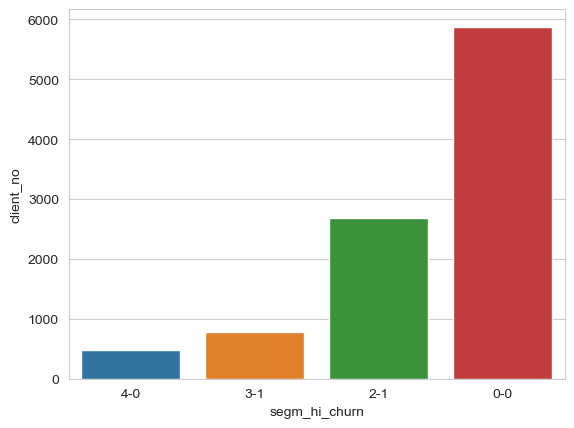

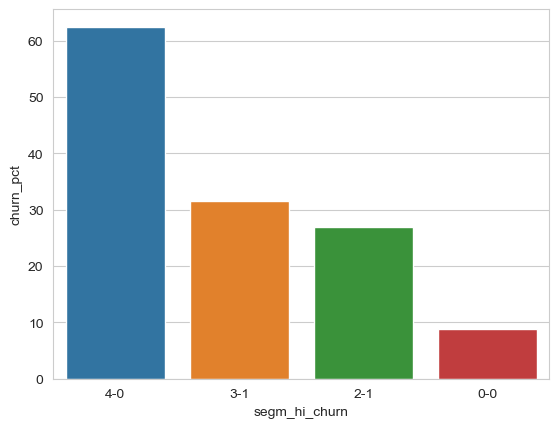

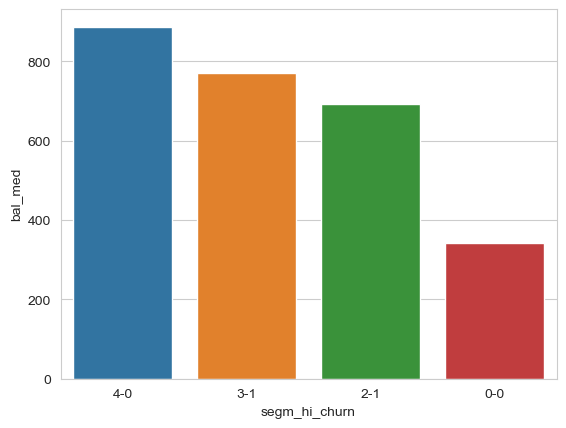

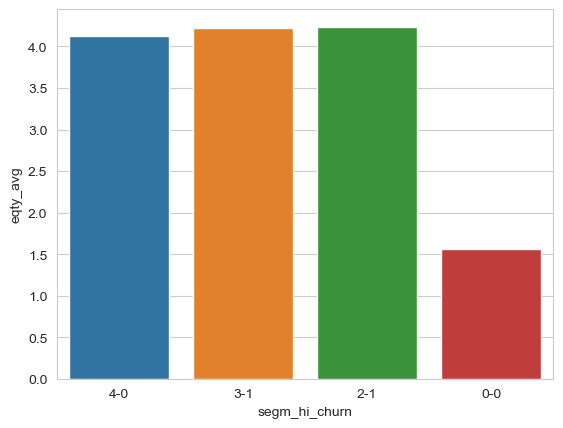

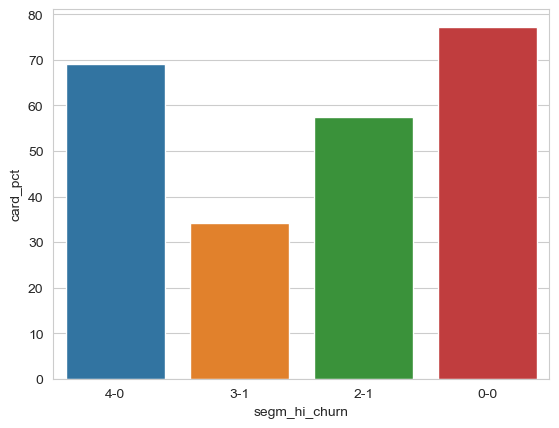

In [100]:
# Делаем датафрейм для графиков
df_graph_segms = df.groupby('segm_hi_churn', as_index=False)\
.agg(client_no=('churn','count'), churn_pct=('churn', 'mean'), 
     bal_med=('balance','median'), eqty_avg = ('equity', 'mean'), card_pct=('credit_card', 'mean'))


df_graph_segms['churn_pct'] = round(df_graph_segms['churn_pct']*100, 2)
df_graph_segms['card_pct'] = round(df_graph_segms['card_pct']*100, 2)

# Задаём список параметров для построения графиков
graph_yax_list = ['client_no', 'churn_pct', 'bal_med', 'eqty_avg', 'card_pct']

# Строим графики
for param in graph_yax_list: 
    sns.barplot(x='segm_hi_churn', y = param, order = ['4-0', '3-1', '2-1', '0-0'], data=df_graph_segms)
    plt.show();

## Ссылка на презентацию для заказчика
https://1drv.ms/b/s!Asj0FEI0IftrgTbQLxmK-yLFJnSw?e=78br68

## Ссылка на инфо-панель для заказчика
https://public.tableau.com/views/bank_clients_profiles/-1?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link